# Assignment 1
## Part I: Data Analysis & Preprocessing
### Step 1: Preprocessing on Penguin

1. Import libraries (e.g. pandas, numpy, matplotlib.pyplot (optionally seaborn). Not allowed: scikit-learn or other libraries with in-built functions that help to implement ML methods).

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from pandas.api.types import CategoricalDtype

2. Load Penguins dataset. Show head(), shape, dtypes. Analyze the dataset, e.g., return the main statistics. Provide a brief description (2-3 sentences) of the dataset: What does it represent / key features.

In [3]:
df = pd.read_csv('/content/drive/MyDrive/penguins.csv')
print("Head: ",df.head())
print("Shape", df.shape)
print("Data types", df.dtypes)

#The dataset represents species of penguins along with their respective features such as island they are found on,
#their calorie requirements, average sleep duration, their bill and flipper dimensions, etc. We can observe that some
# values are missing for example in 3rd row.

Head:    species     island  calorie requirement  average sleep duration  \
0  Adelie  Torgersen                 6563                      11   
1  Adelie  Torgersen                 4890                      14   
2  Adelie  Torgersen                 7184                      11   
3  Adelie  Torgersen                 4169                       8   
4  Adelie  Torgersen                 4774                       8   

   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  gender  \
0            39.1           18.7              181.0       3750.0    male   
1            39.5           17.4              186.0       3800.0  female   
2            40.3           18.0              195.0       3250.0  female   
3             NaN            NaN                NaN        992.0     NaN   
4            36.7           19.3              193.0       3450.0  female   

     year  
0  2007.0  
1  2007.0  
2  2007.0  
3  2007.0  
4  2007.0  
Shape (344, 10)
Data types species               

3. Return basic statistics using describe(). Return missing counts per column table. Which columns have missing values or suspicious values?

In [4]:
print(df.describe())
print(df.isna().sum())
#Every column other than calorie requirement and average sleep duration have missing values in them. gender column
# has the most missing values (17) while year has the least (2).

       calorie requirement  average sleep duration  bill_length_mm  \
count           344.000000              344.000000      337.000000   
mean           5270.002907               10.447674       45.494214   
std            1067.959116                2.265895       10.815787   
min            3504.000000                7.000000       32.100000   
25%            4403.000000                9.000000       39.500000   
50%            5106.500000               10.000000       45.100000   
75%            6212.750000               12.000000       49.000000   
max            7197.000000               14.000000      124.300000   

       bill_depth_mm  flipper_length_mm  body_mass_g         year  
count     333.000000         336.000000   339.000000   342.000000  
mean       18.018318         197.764881  4175.463127  2008.035088  
std         9.241384          27.764491   858.713267     0.816938  
min        13.100000          10.000000   882.000000  2007.000000  
25%        15.700000         

4. Handle missing entries. Possible solutions:

• Drop rows with missing entries. If you have a large dataset and only a few missing features, it may be acceptable to drop the rows containing missing values.

• Impute missing data. Replace the missing entries with the mean/median/mode of the feature. You can use the k-nearest neighbor algorithm to find the matching sample.

In [5]:
for col in df.columns:
  if(df[col].dtype == "object"):
    df[col] = df[col].fillna(df[col].mode()[0])
  else:
    df[col] = df[col].fillna(df[col].median())

print(df.isna().sum())


species                   0
island                    0
calorie requirement       0
average sleep duration    0
bill_length_mm            0
bill_depth_mm             0
flipper_length_mm         0
body_mass_g               0
gender                    0
year                      0
dtype: int64


5. Handle mismatched string formats.
For example, in the penguins dataset, the "Species" feature might appear as "Adelie" or
"adelie," both of which refer to the same penguin species. These variations should be
standardized to a consistent format such as "Adelie" or "adelie".




In [6]:
for col in df.columns:
  if(df[col].dtype == "object"):
    df[col] = df[col].str.lower()
    df[col] = df[col].str.strip().str.lower()


6. Handle outliers. Detect and manage outliers within the dataset.
For example, in the penguins dataset, while flipper lengths typically fall within the range of [180 – 210], certain entries might show values like [10-30]. These can be considered outliers. Possible solutions:

• Remove outliers. If there are just a few outliers, you may eliminate the rows containing these outliers.

• Impute outliers. Replace the outliers with the mean/median/mode of the feature.

In [7]:
for col in df.columns:
    if df[col].dtype != "object":
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers_exists = (df[col] < lower_bound) | (df[col] > upper_bound)
        print("Old outliers----", outliers_exists.sum())

        df.loc[outliers_exists, col] = df[col].median()

        print("New outliers-----", ((df[col] < lower_bound) | (df[col] > upper_bound)).sum())


Old outliers---- 0
New outliers----- 0
Old outliers---- 0
New outliers----- 0
Old outliers---- 9
New outliers----- 0
Old outliers---- 3
New outliers----- 0
Old outliers---- 6
New outliers----- 0
Old outliers---- 3
New outliers----- 0
Old outliers---- 0
New outliers----- 0


/tmp/ipython-input-2037576051.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5106.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[outliers_exists, col] = df[col].median()


7. Data Visulaization Technique used -->

['adelie' 'gentoo' 'chinstrap']


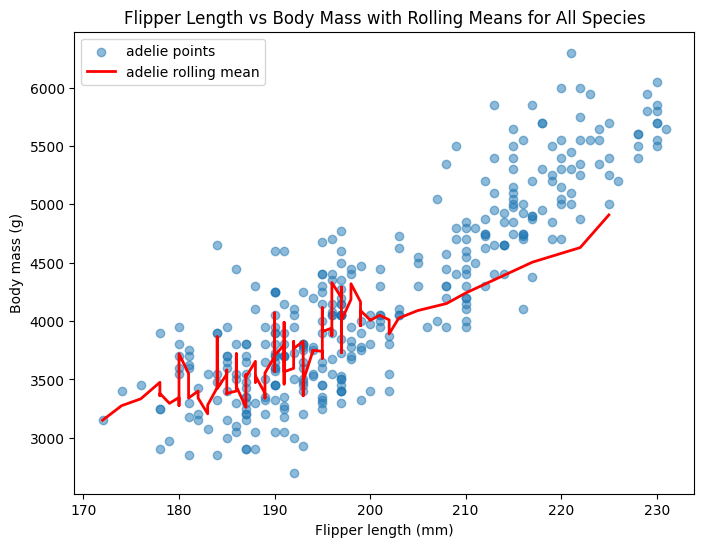

In [8]:
import seaborn as sns

# Set of unique species
print(df['species'].unique())

# <-- Visulaization 1 -->
species_chosen = "adelie"
plt.figure(figsize=(8,6))
plt.scatter(df["flipper_length_mm"], df["body_mass_g"], alpha=0.5, label=f"{species_chosen} points")
# species-wise rolling mean sorted by 'flipper_length_mm' for one chosen species
sub = df[df["species"] == species_chosen].sort_values("flipper_length_mm")
sub["rolling_mean"] = sub["body_mass_g"].rolling(window=5, min_periods=1).mean()
plt.plot(sub["flipper_length_mm"], sub["rolling_mean"], color="red", linewidth=2, label=f"{species_chosen} rolling mean")
# Labels, title, legend
plt.xlabel("Flipper length (mm)")
plt.ylabel("Body mass (g)")
plt.title("Flipper Length vs Body Mass with Rolling Means for All Species")
plt.legend()

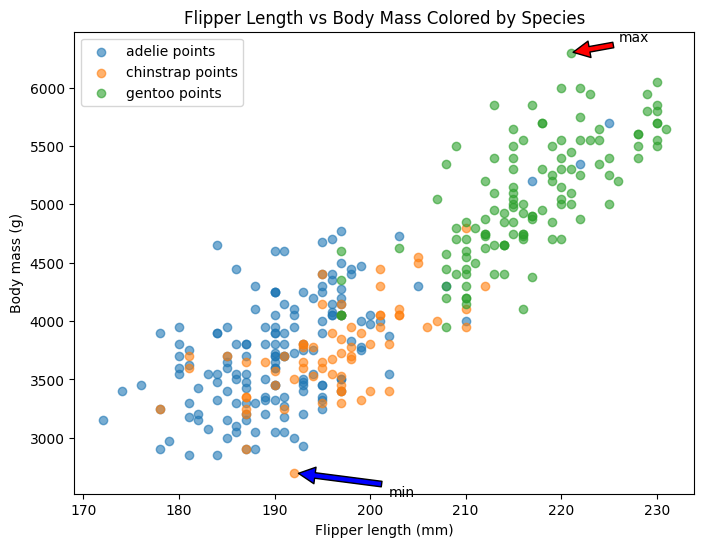

In [9]:
# <-- Visulaization 2 -->
plt.figure(figsize=(8,6))
for species, subdf in df.groupby("species"):
    # Scatter plot for all the species
    plt.scatter(subdf["flipper_length_mm"], subdf["body_mass_g"], alpha=0.6, label=f"{species} points")
# Find global max and min of body_mass_g
max_row = df.loc[df["body_mass_g"].idxmax()]
min_row = df.loc[df["body_mass_g"].idxmin()]

# Annotate global max of body_mass_g
plt.annotate(
    "max",
    xy=(max_row["flipper_length_mm"], max_row["body_mass_g"]),
    xytext=(max_row["flipper_length_mm"] + 5, max_row["body_mass_g"] + 100),
    arrowprops=dict(facecolor='red', shrink=0.05)
)

# Annotate global min of body_mass_g
plt.annotate(
    "min",
    xy=(min_row["flipper_length_mm"], min_row["body_mass_g"]),
    xytext=(min_row["flipper_length_mm"] + 10, min_row["body_mass_g"] - 200),
    arrowprops=dict(facecolor='blue', shrink=0.05)
)
# Labels, title, legend
plt.xlabel("Flipper length (mm)")
plt.ylabel("Body mass (g)")
plt.title("Flipper Length vs Body Mass Colored by Species")
plt.legend()
plt.show()

                        calorie requirement  average sleep duration  \
calorie requirement                1.000000               -0.055628   
average sleep duration            -0.055628                1.000000   
bill_length_mm                    -0.012318                0.048384   
bill_depth_mm                     -0.081272               -0.014183   
flipper_length_mm                  0.004876                0.082554   
body_mass_g                        0.041276                0.078071   
year                              -0.025313                0.040482   

                        bill_length_mm  bill_depth_mm  flipper_length_mm  \
calorie requirement          -0.012318      -0.081272           0.004876   
average sleep duration        0.048384      -0.014183           0.082554   
bill_length_mm                1.000000      -0.208758           0.648653   
bill_depth_mm                -0.208758       1.000000          -0.559477   
flipper_length_mm             0.648653      -0.5594

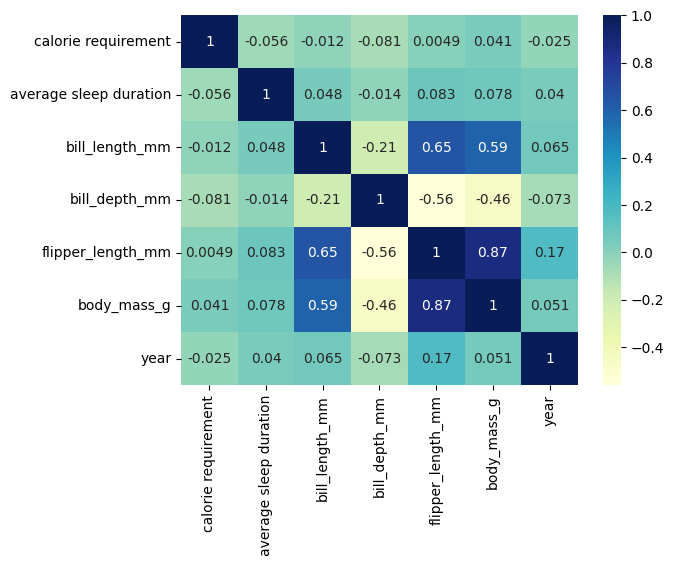

In [10]:
# <-- Visulaization 3 -->
# Correlation Heatmap between the numeric features from the dataset
correlation_mtx = df.corr(numeric_only=True)
print(correlation_mtx)
# Plot correlation heatmap
sns.heatmap(correlation_mtx, cmap="YlGnBu", annot=True)
plt.show()

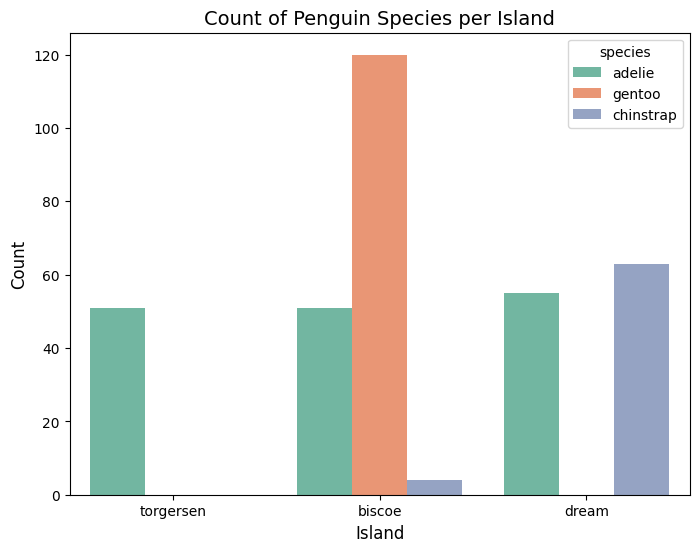

In [11]:
# <-- Visulaization 4 -->
# Count Plot of Species by Island
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='island', hue='species', palette='Set2')
plt.title("Count of Penguin Species per Island", fontsize=14)
plt.xlabel("Island", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

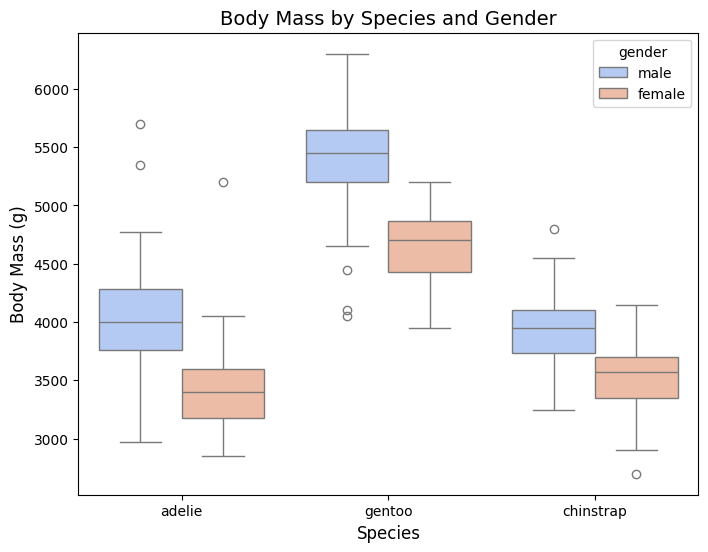

In [12]:
# <-- Visulaization 5 -->
# Line plot: Average calorie requirement trend by year and species
plt.figure(figsize=(8, 6))
sns.boxplot(x="species",y="body_mass_g",hue="gender",data=df,palette='coolwarm')
# Customize the plot
plt.xlabel("Species", fontsize=12)
plt.ylabel("Body Mass (g)", fontsize=12)
plt.title("Body Mass by Species and Gender", fontsize=14)
# Show the plot
plt.show()

8. Identifying related and unrelated features

In [13]:
print(df.columns)
# Select only numeric columns
# Encode categorical target
df['species_encoded'] = pd.factorize(df['species'])[0]
df['gender_encoded'] = pd.factorize(df['gender'])[0]
df['island_encoded']= pd.factorize(df['island'])[0]
# Unique Target features
print(df['species_encoded'].unique(),df['gender_encoded'].unique(),df['island_encoded'].unique())
target = 'species_encoded'
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# remove target itself
numeric_features.remove(target)
print(numeric_features)
# Only numeric features + target
numeric_df = df[numeric_features + [target]]
# Compute correlation of each feature with target
correlations = numeric_df.corr()[target].drop(target)
print(abs(correlations))

# Upon understanding the correlation value with respect to the target "species" below are the
# weak features selected to be dropped from the main dataset
weak_features = ['gender_encoded', 'average sleep duration', 'year']

df = df.drop(columns=weak_features)
print("Dropped weakly correlated features:", weak_features)

df.info()

Index(['species', 'island', 'calorie requirement', 'average sleep duration',
       'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
       'gender', 'year'],
      dtype='object')
[0 1 2] [0 1] [0 1 2]
['calorie requirement', 'average sleep duration', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'year', 'gender_encoded', 'island_encoded']
calorie requirement       0.074212
average sleep duration    0.014659
bill_length_mm            0.743253
bill_depth_mm             0.151779
flipper_length_mm         0.347425
body_mass_g               0.195783
year                      0.004029
gender_encoded            0.010557
island_encoded            0.432839
Name: species_encoded, dtype: float64
Dropped weakly correlated features: ['gender_encoded', 'average sleep duration', 'year']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------  

9. Converting (Species,island and gender) into categorical columns.

In [14]:
for col in df.columns:
  if(df[col].dtype=="object"):
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   species              344 non-null    category
 1   island               344 non-null    category
 2   calorie requirement  344 non-null    float64 
 3   bill_length_mm       344 non-null    float64 
 4   bill_depth_mm        344 non-null    float64 
 5   flipper_length_mm    344 non-null    float64 
 6   body_mass_g          344 non-null    float64 
 7   gender               344 non-null    category
 8   species_encoded      344 non-null    int64   
 9   island_encoded       344 non-null    int64   
dtypes: category(3), float64(5), int64(2)
memory usage: 20.3 KB


10. Normalizing the non categorical features

In [15]:
new_numeric_features = df.select_dtypes(include=['float64']).columns.tolist()
print(new_numeric_features)

# Values before normalizing
print(df[new_numeric_features].describe())

# Print Min and Max value of each column
for col in new_numeric_features:
  print(f"Min Value of {col}: {df[col].min()}")
  print(f"Max Value of {col}: {df[col].max()}")
  print("\n")

# Rescaling the value to the 0 to 1
for col in new_numeric_features:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

# Values after normalizing
df[new_numeric_features].describe()
print(df.head())

['calorie requirement', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
       calorie requirement  bill_length_mm  bill_depth_mm  flipper_length_mm  \
count           344.000000      344.000000     344.000000         344.000000   
mean           5270.002907       44.069767      17.176163         200.825581   
std            1067.959116        5.357261       1.925844          13.900263   
min            3504.000000       32.100000      13.100000         172.000000   
25%            4403.000000       39.600000      15.700000         190.000000   
50%            5106.500000       45.100000      17.300000         197.000000   
75%            6212.750000       48.425000      18.600000         213.000000   
max            7197.000000       59.600000      21.500000         231.000000   

       body_mass_g  
count   344.000000  
mean   4200.872093  
std     796.280509  
min    2700.000000  
25%    3550.000000  
50%    4050.000000  
75%    4750.000000  
max    6300.0000

Step 2: Refactor into a Reusable Preprocessing Method

1. Create a reusable structure - Create a pipeline


In [16]:
def handle_missing_values(df):
  df = df.copy()
  summary = {"missing_values": {}}
  for col in df.columns:
    missing_before = df[col].isna().sum()
    if df[col].dtype == "object" or isinstance(df[col].dtype, pd.CategoricalDtype):
      df[col] = df[col].fillna(df[col].mode()[0])
      strategy="mode"
    else:
      df[col] = df[col].fillna(df[col].median())
      strategy="mean"
    # Save info in summary
    summary["missing_values"][col] = {
    "missing_count": missing_before,
    "strategy": strategy
      }
  return df,summary


def cleaning_strings(df):
  df = df.copy()
  summary = {"string_cleaning": []}
  for col in df.columns:
    if(df[col].dtype == "object"):
      # Save info in summary
      summary["string_cleaning"].append(col)
      df[col] = df[col].str.lower()
      df[col] = df[col].str.strip()

  return df,summary


def outliers_detection_treatment(df):
  df = df.copy()
  summary = {"outliers_handled": {}}
  for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers_exists = (df[col] < lower_bound) | (df[col] > upper_bound)
        count_outliers = outliers_exists.sum()
        summary["outliers_handled"][col] = int(count_outliers)
        if not df[col].isna().all():
          df.loc[outliers_exists, col] = df[col].median()
  return df,summary


def encode_catagorical(df):
  df = df.copy()
  summary = {"encoded_columns": []}
  for col in df.columns:
    if df[col].dtype == "object" or isinstance(df[col].dtype, pd.CategoricalDtype):
      encoded_col = f"{col}_encoded"
      df[encoded_col] = pd.factorize(df[col])[0]
      summary["encoded_columns"].append(encoded_col)
  return df,summary


def drop_features(df,target):
  df = df.copy()
  summary = {"dropped_columns": []}
  numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
  numeric_features.remove(target)
  numeric_df = df[numeric_features + [target]]
  correlations = numeric_df.corr()[target].drop(target)

  low_corr_features = correlations[correlations.abs() < 0.05].index.tolist()
  summary["dropped_columns"] = low_corr_features

  df = df.drop(columns=low_corr_features)

  for col in df.columns:
    if(df[col].dtype=="object"):
      df[col] = df[col].astype('category')
  return df,summary

def scale_numeric(df):
  df = df.copy()
  summary = {"scaled_columns": {}}
  numeric_cols = df.select_dtypes(include=['float64']).columns

  for col in numeric_cols:
    min_val = df[col].min()
    max_val = df[col].max()

    if min_val != max_val:
      df[col] = (df[col] - min_val) / (max_val - min_val)
      summary["scaled_columns"][col] = {"min": float(min_val), "max": float(max_val)}
  return df,summary

# Made this function to pretty print
def print_summary(summary_all):

    def to_native(val):
        if isinstance(val, (np.integer, np.int64, np.int32)):
            return int(val)
        elif isinstance(val, (np.floating, np.float64, np.float32)):
            return float(val)
        return val

    print("\n===== PREPROCESSING SUMMARY =====\n")

    for step, info in summary_all.items():
        step_name = step.replace('_', ' ').title()
        print(f"--- {step_name} ---")

        if isinstance(info, dict):
            if info:
                for key, value in info.items():
                    if isinstance(value, dict):
                        # Convert nested numpy values
                        value = {k: to_native(v) for k, v in value.items()}
                    else:
                        value = to_native(value)
                    print(f"{key}: {value}")
            else:
                print("(None)")

        elif isinstance(info, list):
            if info:
                print(", ".join(info))
            else:
                print("(None)")

        else:
            print(to_native(info))
         # blank line
        print()

def preprocess_df(df,target = None):
  summary_all = {}
  df,summary_missing = handle_missing_values(df)
  df,summary_cleaning = cleaning_strings(df)
  df,summary_outliers = outliers_detection_treatment(df)
  df,summary_encoded = encode_catagorical(df)
  if target is None:
    target = random.choice(df.columns)    #choose random column if not provided
  df,summary_dropped = drop_features(df,target)
  df,summary_scaled = scale_numeric(df)
  # Combined all the summary into a single main summary
  summary_all = {**summary_missing,
                **summary_cleaning,
               **summary_outliers,
               **summary_encoded,
               **summary_dropped,
               **summary_scaled}
  print_summary(summary_all)
  return df

2. Fit and transform on Penguins using above created pipeline.




In [17]:
penguins_df = pd.read_csv('/content/drive/MyDrive/penguins.csv')

pipelined_penguins = preprocess_df(penguins_df,"species_encoded")

equal_bool = pipelined_penguins.equals(df)

print("Is same- ",equal_bool )

print("Original shape:", pipelined_penguins.shape)
print("Processed shape:", df.shape)

print("Original columns:", pipelined_penguins.columns.tolist())
print("Processed columns:", df.columns.tolist())


print("Original dtypes:\n",df.dtypes )
print("Processed dtypes:\n",  pipelined_penguins.dtypes)


===== PREPROCESSING SUMMARY =====

--- Missing Values ---
species: {'missing_count': 11, 'strategy': 'mode'}
island: {'missing_count': 10, 'strategy': 'mode'}
calorie requirement: {'missing_count': 0, 'strategy': 'mean'}
average sleep duration: {'missing_count': 0, 'strategy': 'mean'}
bill_length_mm: {'missing_count': 7, 'strategy': 'mean'}
bill_depth_mm: {'missing_count': 11, 'strategy': 'mean'}
flipper_length_mm: {'missing_count': 8, 'strategy': 'mean'}
body_mass_g: {'missing_count': 5, 'strategy': 'mean'}
gender: {'missing_count': 17, 'strategy': 'mode'}
year: {'missing_count': 2, 'strategy': 'mean'}

--- String Cleaning ---
species, island, gender

--- Outliers Handled ---
calorie requirement: 0
average sleep duration: 0
bill_length_mm: 9
bill_depth_mm: 3
flipper_length_mm: 6
body_mass_g: 3
year: 0

--- Encoded Columns ---
species_encoded, island_encoded, gender_encoded

--- Dropped Columns ---
average sleep duration, year, gender_encoded

--- Scaled Columns ---
calorie requiremen

/tmp/ipython-input-2405034720.py:49: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5106.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[outliers_exists, col] = df[col].median()


## 3. Save dataset

Step 3:

In [18]:
pipelined_penguins.to_csv('penguins_preprocessed.csv', index=False)

In [19]:

# Imprted the new dataset
dataset_1= pd.read_csv("/content/drive/MyDrive/emissions_by_country.csv")

# Showing the first 5 rows of the dataset
print("Before Preprocessing\n")
print(dataset_1.head(),'\n')
print("Shape of the dataset:")
print(dataset_1.shape,'\n')
print("Data types of the dataset:")
print(dataset_1.dtypes,'\n')
# About the dataset
# This dataset, emissions_by_country.csv, contains
# information on greenhouse gas emissions by
# different countries. It includes various features such as country names,
# years, and corresponding emission values, which can be used to analyze global green house gas emission trends.


Before Preprocessing

       Country ISO 3166-1 alpha-3    Year  Total  Temperature  \
0  Afghanistan                AFG  1750.0    0.0           70   
1  Afghanistan                AFG  1751.0    0.0           66   
2  Afghanistan                AFG  1752.0    0.0           72   
3  Afghanistan                AFG  1753.0    0.0           44   
4  Afghanistan                AFG  1754.0    0.0           21   

   GDP Per Capita (USD)  Coal  Oil  Gas  Cement  Flaring  Other  Per Capita  
0                 55455   NaN  NaN  NaN     NaN      NaN    NaN         NaN  
1                 45101   NaN  NaN  NaN     NaN      NaN    NaN         NaN  
2                 31891   NaN  NaN  NaN     NaN      NaN    NaN         NaN  
3                 35466   NaN  NaN  NaN     NaN      NaN    NaN         NaN  
4                 33247   NaN  NaN  NaN     NaN      NaN    NaN         NaN   

Shape of the dataset:
(63104, 13) 

Data types of the dataset:
Country                  object
ISO 3166-1 alpha-3    

## Step 3 ---> Apply your reusable code to two other datasets

## a) Working with the emission dataset

In [20]:
# In this dataset we don't have any natural binary column or feature to choose but we can consider
# emission values as target variable like which country had emission for a particaular year or not.
# So we can consider "emission" column as target variable.

dataset_1['emission_exists']=dataset_1['Total'].apply(lambda x: 1 if x>0 else 0)

# Show first few rows to verify
print(dataset_1[['Country', 'Year', 'Total', 'emission_exists']].head())

# Count class distribution
class_counts = dataset_1['emission_exists'].value_counts()
print("Class counts:\n", class_counts)

# Percentage distribution to check if datais imbalanced or not
class_percent = dataset_1['emission_exists'].value_counts(normalize=True) * 100
print("\nClass percentage:\n", class_percent)

print(dataset_1.shape)


       Country    Year  Total  emission_exists
0  Afghanistan  1750.0    0.0                0
1  Afghanistan  1751.0    0.0                0
2  Afghanistan  1752.0    0.0                0
3  Afghanistan  1753.0    0.0                0
4  Afghanistan  1754.0    0.0                0
Class counts:
 emission_exists
0    41156
1    21948
Name: count, dtype: int64

Class percentage:
 emission_exists
0    65.21932
1    34.78068
Name: proportion, dtype: float64
(63104, 14)


## 3. Preview of the transformed dataset (first 5 rows, column names)

In [21]:
emission_processed = preprocess_df(dataset_1,"emission_exists")

print("After Preprocessing\n")
print(emission_processed.head(),'\n')
print("Shape of the dataset:")
print(emission_processed.shape,'\n')


===== PREPROCESSING SUMMARY =====

--- Missing Values ---
Country: {'missing_count': 2017, 'strategy': 'mode'}
ISO 3166-1 alpha-3: {'missing_count': 3621, 'strategy': 'mode'}
Year: {'missing_count': 797, 'strategy': 'mean'}
Total: {'missing_count': 723, 'strategy': 'mean'}
Temperature: {'missing_count': 0, 'strategy': 'mean'}
GDP Per Capita (USD): {'missing_count': 0, 'strategy': 'mean'}
Coal: {'missing_count': 41307, 'strategy': 'mean'}
Oil: {'missing_count': 41330, 'strategy': 'mean'}
Gas: {'missing_count': 41387, 'strategy': 'mean'}
Cement: {'missing_count': 42616, 'strategy': 'mean'}
Flaring: {'missing_count': 41766, 'strategy': 'mean'}
Other: {'missing_count': 60419, 'strategy': 'mean'}
Per Capita: {'missing_count': 43712, 'strategy': 'mean'}
emission_exists: {'missing_count': 0, 'strategy': 'mean'}

--- String Cleaning ---
Country, ISO 3166-1 alpha-3

--- Outliers Handled ---
Year: 1145
Total: 13622
Temperature: 0
GDP Per Capita (USD): 0
Coal: 21791
Oil: 21768
Gas: 8461
Cement: 

Top 5 Countries by Total Emissions: ['Haiti', 'Sint Maarten (Dutch Part)', 'Barbados', 'Malawi', 'Fiji']


/tmp/ipython-input-1646482491.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_per_capita, x='Country', y='Per Capita', palette='Reds_r')


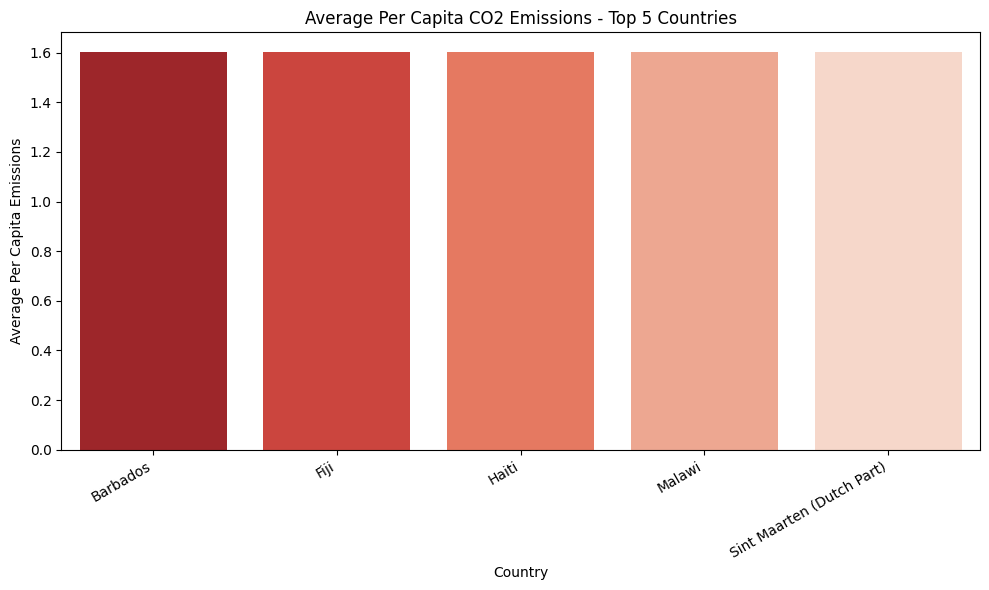

In [22]:
# <---Visulaiztion 1-->
# Calculate average per capita for top 5 countries
# Identify top 5 countries by TOTAL emissions
# STEP 1: Clean the 'Country' column ---
emission_processed['Country'] = (
    emission_processed['Country']
    .astype(str)              # Ensure strings
    .str.replace('\xa0', ' ') # Remove weird non-breaking spaces
    .str.strip()              # Remove leading/trailing spaces
    .str.title()              # Consistent capitalization
)
top_5_countries = (
    emission_processed.groupby('Country')['Total']
    .sum()
    .nlargest(5)
    .index
)
print("Top 5 Countries by Total Emissions:", list(top_5_countries))
filtered_df = emission_processed[emission_processed['Country'].isin(top_5_countries)]

avg_per_capita = (
    filtered_df.groupby('Country', as_index=False)['Per Capita']
    .mean()
    .sort_values(by='Per Capita', ascending=False)
)

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_per_capita, x='Country', y='Per Capita', palette='Reds_r')
plt.title("Average Per Capita CO2 Emissions - Top 5 Countries")
plt.xlabel("Country")
plt.ylabel("Average Per Capita Emissions")
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()
# All the Top 5 Countries have similar/same average per capita emissions.


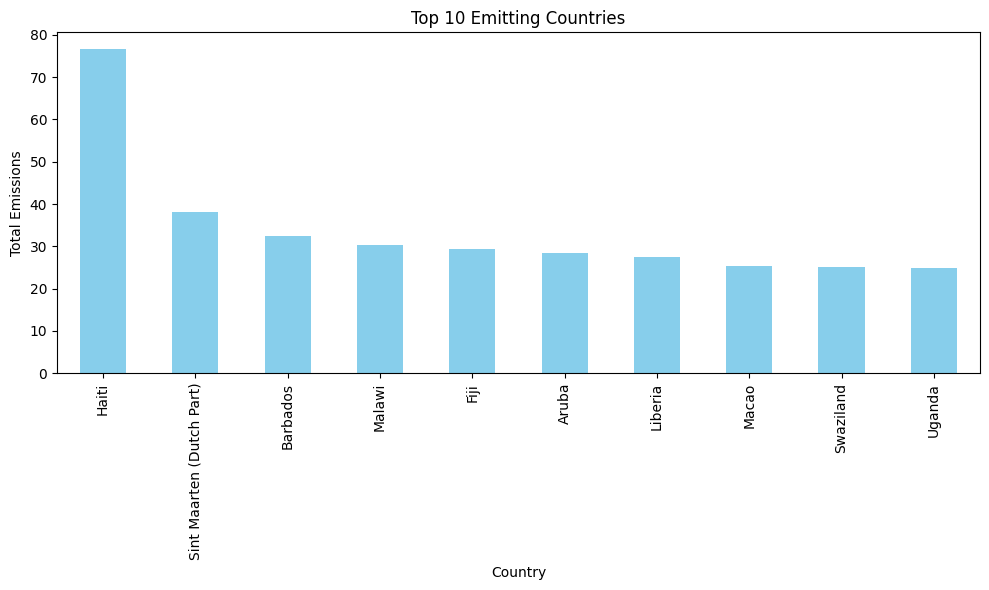

In [23]:
# <---Visulaiztion 2-->
# Top 10 global green house gas emission countries
plt.figure(figsize=(10,6))
emission_processed_grouped_country = emission_processed.groupby("Country")["Total"].sum().sort_values(ascending=False).head(10)
emission_processed_grouped_country.plot(kind='bar',color='skyblue')
plt.title("Top 10 Emitting Countries")
plt.xlabel("Country")
plt.ylabel("Total Emissions")
plt.tight_layout()
plt.show()

# Haiti has the highest emission and Uganda has the lowest


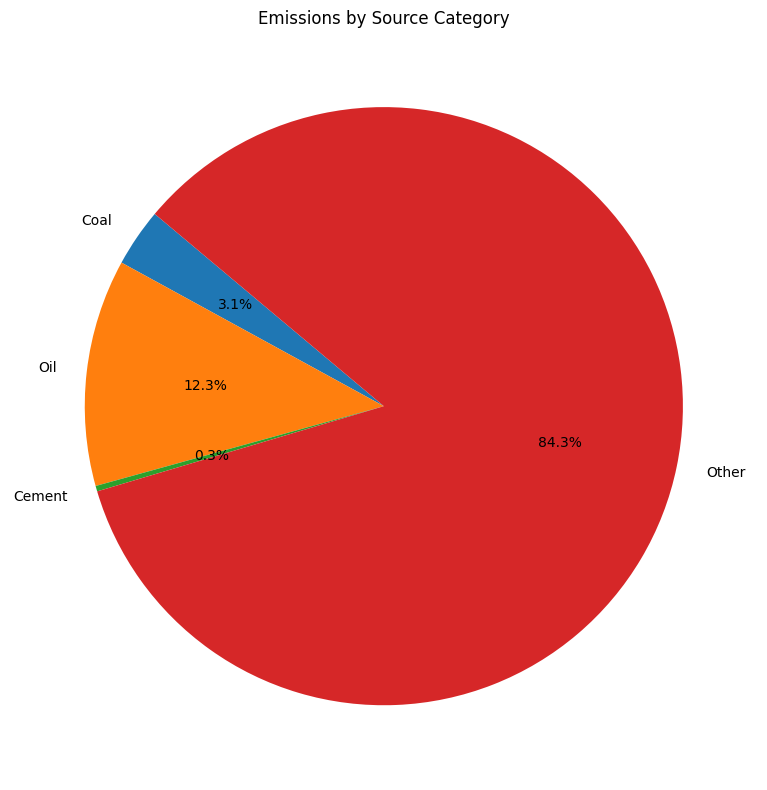

In [24]:
# <---Visulaiztion 3-->
# Emissions by few of the Source Category
plt.figure(figsize=(8, 8))
source_columns = ["Coal", "Oil", "Cement","Other"]
emission_processed_sources = emission_processed[source_columns].sum()
plt.pie(emission_processed_sources, labels=source_columns, autopct='%1.1f%%', startangle=140)
plt.title("Emissions by Source Category")
plt.tight_layout()
plt.show()

# Apart from others Coal and oil contribute as a significant source of emission.

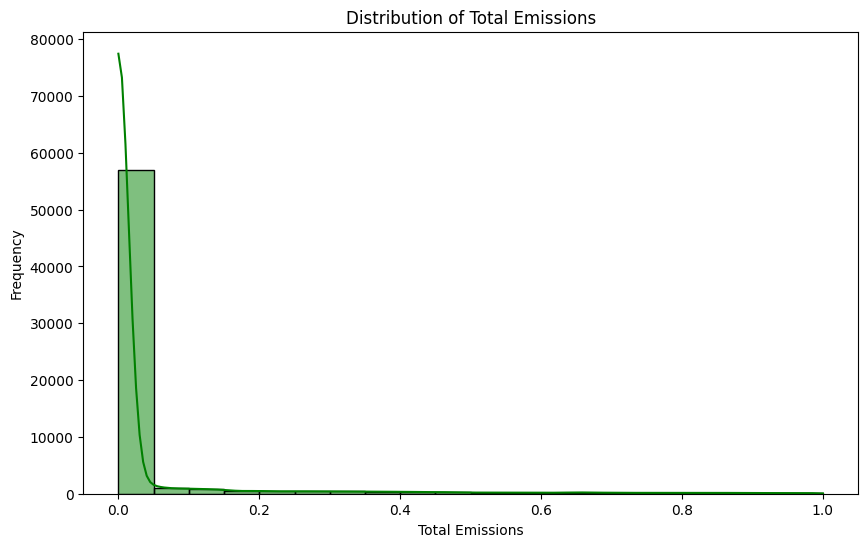

In [25]:
# <---Visulaiztion 4-->
# Distribution of Total Emissions
plt.figure(figsize=(10, 6))
sns.histplot(emission_processed["Total"], bins=20, kde=True, color='green')
plt.title("Distribution of Total Emissions")
plt.xlabel("Total Emissions")
plt.ylabel("Frequency")
plt.show()
# Shows weather data follows normal or sweked distribution

                     Year     Total  emission_exists
Year             1.000000  0.232623         0.658426
Total            0.232623  1.000000         0.360995
emission_exists  0.658426  0.360995         1.000000


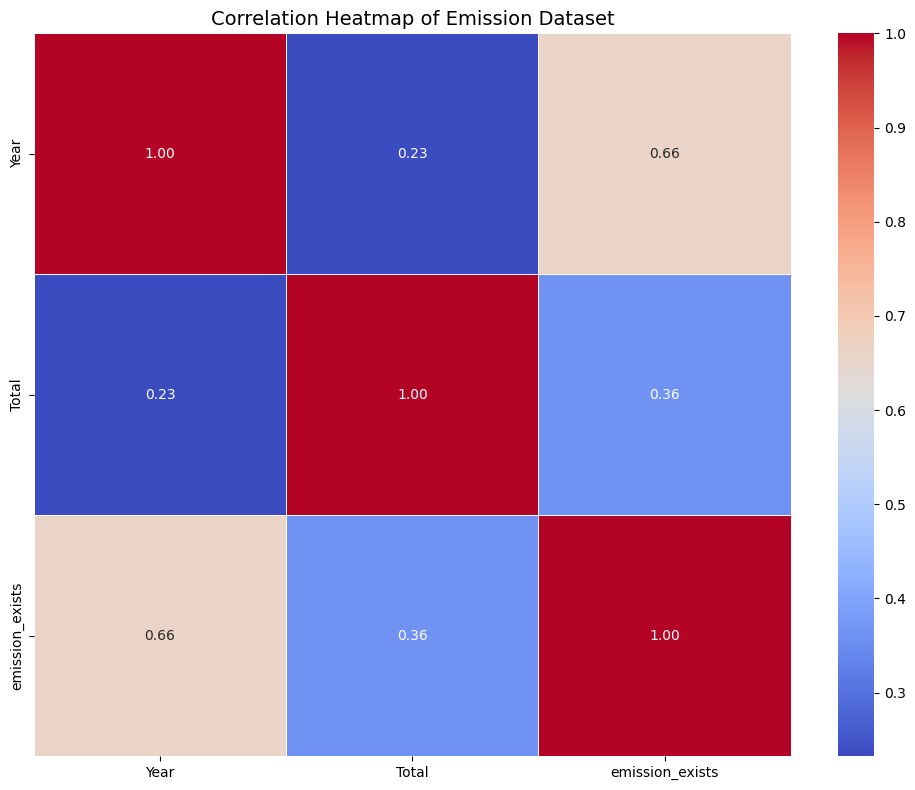

In [26]:
# <---Visulaiztion 5-->
numeric_cols = ['Year', 'Total','emission_exists']
corr_matrix = emission_processed[numeric_cols].corr()
print(corr_matrix)
# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Emission Dataset", fontsize=14)
plt.tight_layout()
plt.show()

# The year has a high correlation between the emission_exists and total emission.

# 5. Saving the dataset

In [27]:
emission_processed.to_csv('emissions_by_country_preprocessed.csv', index=False)

## 6. Short Summary -->
* **Missing rows :** Filled missing values with **median for numeric columns** and **mode for categorical columns**.
* **Outliers:** Detected using **IQR (1.5×IQR rule)** and replaced with the **median**.
* **Encoded columns:** All categorical columns were **factorized** into numeric codes with a `_encoded` suffix.
* **Scaled numeric features:** All **float numeric columns** were scaled to the **0–1 range (min-max scaling)**.
* **Dropping features** with absolute correlation below 0.05 are considered insignificant and removed.



## b) Working with the breeding_bird_atlas dataset

In [28]:
# Imprted the new dataset
dataset_2= pd.read_csv("/content/drive/MyDrive/breeding_bird_atlas.csv")

# Showing the first 5 rows of the dataset
print("Before Preprocessing\n")
print(dataset_2.head(),'\n')
print("Shape of the dataset:")
print(dataset_2.shape,'\n')
print("Data types of the dataset:")
print(dataset_2.dtypes,'\n')
print(dataset_2.info())

Before Preprocessing

   Fed. Region Block ID                                           Map Link  \
0          NaN    5773C                                                 50   
1          8.0    5569B  http://www.dec.ny.gov/data/dfwmr/bba/pdf/5569b...   
2          8.0    5773C  http://www.dec.ny.gov/data/dfwmr/bba/pdf/5773c...   
3          8.0    5872A  http://www.dec.ny.gov/data/dfwmr/bba/pdf/5872a...   
4          8.0    5570D  http://www.dec.ny.gov/data/dfwmr/bba/pdf/5570d...   

   County          Common Name        Scientific Name NYS Protection Status  \
0     NaN                  NaN                     12                    10   
1  ALBANY     Alder Flycatcher      Empidonax alnorum             Protected   
2  ALBANY  American Black Duck          Anas rubripes          Game Species   
3  ALBANY  American Black Duck          Anas rubripes          Game Species   
4  ALBANY        American Crow  Corvus brachyrhynchos          Game Species   

  Family Name     Family Descripti

In [29]:
# Check unique values in Breeding Status
print(dataset_2['Breeding Status'].value_counts())

# Percentage distribution to check if datais imbalanced or not
class_percent = dataset_2['Breeding Status'].value_counts(normalize=True) * 100
print("\nClass percentage:\n", class_percent)

# Creating binary target for Breeding Status
dataset_2['Breeding_Binary'] = dataset_2['Breeding Status'].apply(lambda x: 1 if x == 'Confirmed' else 0)

# Verify results
print(dataset_2[['Breeding Status', 'Breeding_Binary']].head())

# Check class counts
print("\nClass counts:\n", dataset_2['Breeding_Binary'].value_counts())

# Check class percentages
print("\nClass percentages:\n", dataset_2['Breeding_Binary'].value_counts(normalize=True) * 100)



Breeding Status
Confirmed    142635
Possible     110025
Probable     108922
Name: count, dtype: int64

Class percentage:
 Breeding Status
Confirmed    39.447484
Possible     30.428782
Probable     30.123734
Name: proportion, dtype: float64
  Breeding Status  Breeding_Binary
0        Probable                0
1       Confirmed                1
2        Probable                0
3        Possible                0
4        Probable                0

Class counts:
 Breeding_Binary
0    218947
1    142635
Name: count, dtype: int64

Class percentages:
 Breeding_Binary
0    60.552516
1    39.447484
Name: proportion, dtype: float64


## 3. Preview of the transformed dataset (first 5 rows, column names)

In [30]:
breeding_bird_atlas_preprocessed = preprocess_df(dataset_2,"Breeding_Binary")
print("After Preprocessing\n")
print(breeding_bird_atlas_preprocessed.head(),'\n')
print("Shape of the dataset:")
print(breeding_bird_atlas_preprocessed.shape,'\n')


===== PREPROCESSING SUMMARY =====

--- Missing Values ---
Fed. Region: {'missing_count': 5795, 'strategy': 'mean'}
Block ID: {'missing_count': 2718, 'strategy': 'mode'}
Map Link: {'missing_count': 4717, 'strategy': 'mode'}
County: {'missing_count': 10602, 'strategy': 'mode'}
Common Name: {'missing_count': 10530, 'strategy': 'mode'}
Scientific Name: {'missing_count': 7485, 'strategy': 'mode'}
NYS Protection Status: {'missing_count': 8470, 'strategy': 'mode'}
Family Name: {'missing_count': 2456, 'strategy': 'mode'}
Family Description: {'missing_count': 4733, 'strategy': 'mode'}
Breeding Behavior: {'missing_count': 5183, 'strategy': 'mode'}
Month: {'missing_count': 358156, 'strategy': 'mean'}
Day: {'missing_count': 352244, 'strategy': 'mean'}
Year: {'missing_count': 10480, 'strategy': 'mean'}
Temperature: {'missing_count': 0, 'strategy': 'mean'}
Average UB Student GPA: {'missing_count': 0, 'strategy': 'mean'}
Breeding Status: {'missing_count': 0, 'strategy': 'mode'}
Breeding_Binary: {'mi

## 4) Visualizations

Top 5 Countries by Total Emissions: ['St Lawrence', 'Suffolk', 'Steuben', 'Oneida', 'Herkimer']
        County  Observation_Count
0  St Lawrence              29048
1      Suffolk              10317
2      Steuben              10088
3     Herkimer               9347
4       Oneida               8947


/tmp/ipython-input-3054861028.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=county_counts, x='County', y='Observation_Count', palette='viridis')


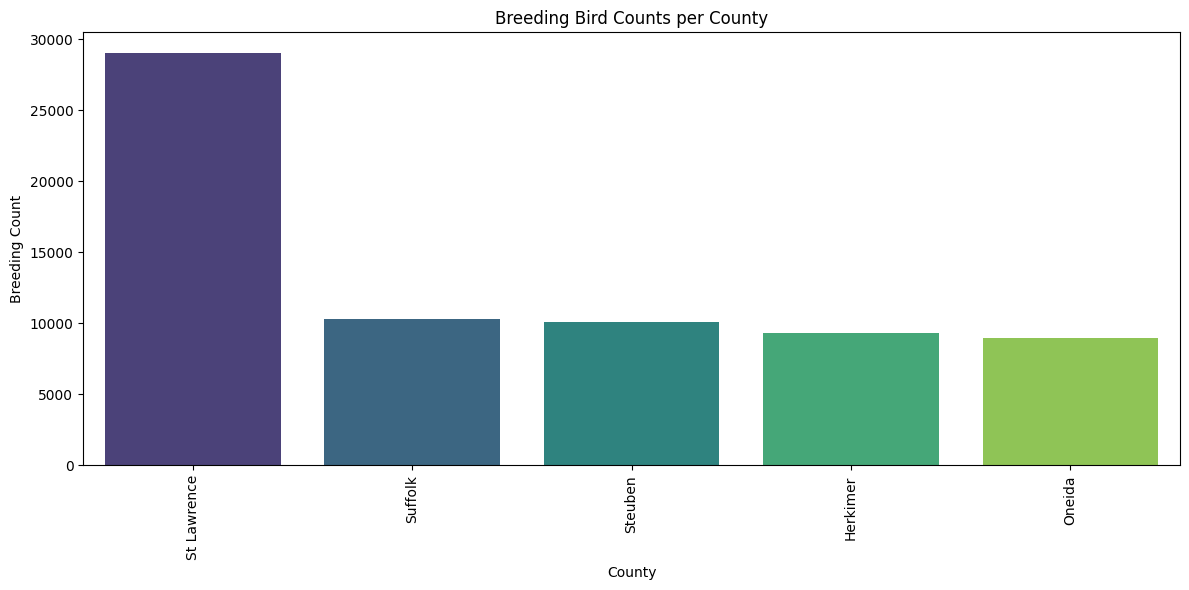

In [31]:
# <---Visulaiztion 1-->
# Removed the Unwanted strings from the County columns for proper plotting
breeding_bird_atlas_preprocessed['County'] = (
    breeding_bird_atlas_preprocessed['County']
    .astype(str)              # Ensure strings
    .str.replace('\xa0', ' ') # Remove weird non-breaking spaces
    .str.strip()              # Remove leading/trailing spaces
    .str.title()              # Consistent capitalization
    .str.replace(r'\d+', '', regex=True)  # Remove digits
)
# Top 5 county where the breeding bird observations are most frequent
top_5_county = (
    breeding_bird_atlas_preprocessed.groupby('County')['Breeding_Binary']
    .sum()
    .nlargest(5)
    .index
)
print("Top 5 Countries by Total Emissions:", list(top_5_county))

# Filtered the preprocced datatset using the top 5 county
filtered_df_1 = breeding_bird_atlas_preprocessed[breeding_bird_atlas_preprocessed['County'].isin(top_5_county)]

# Show the breeding bird observations are most frequent
# Group by County and sum breeding occurrences
county_breeding = filtered_df_1.groupby('County')['Breeding_Binary'].sum().reset_index()

# Count observations per county
county_counts = filtered_df_1['County'].value_counts().reset_index()
county_counts.columns = ['County', 'Observation_Count']
# Printing the county wise total obervation for top 5 county
print(county_counts)

plt.figure(figsize=(12,6))
sns.barplot(data=county_counts, x='County', y='Observation_Count', palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('County')
plt.ylabel('Breeding Count')
plt.title('Breeding Bird Counts per County')
plt.tight_layout()
plt.show()

# The plot depicts the Top 5 county breading count per county.

   Year  Breeding_Count
0   0.0           11367
1   0.2           17923
2   0.4           22624
3   0.6           36280
4   0.8           35305
5   1.0           19136


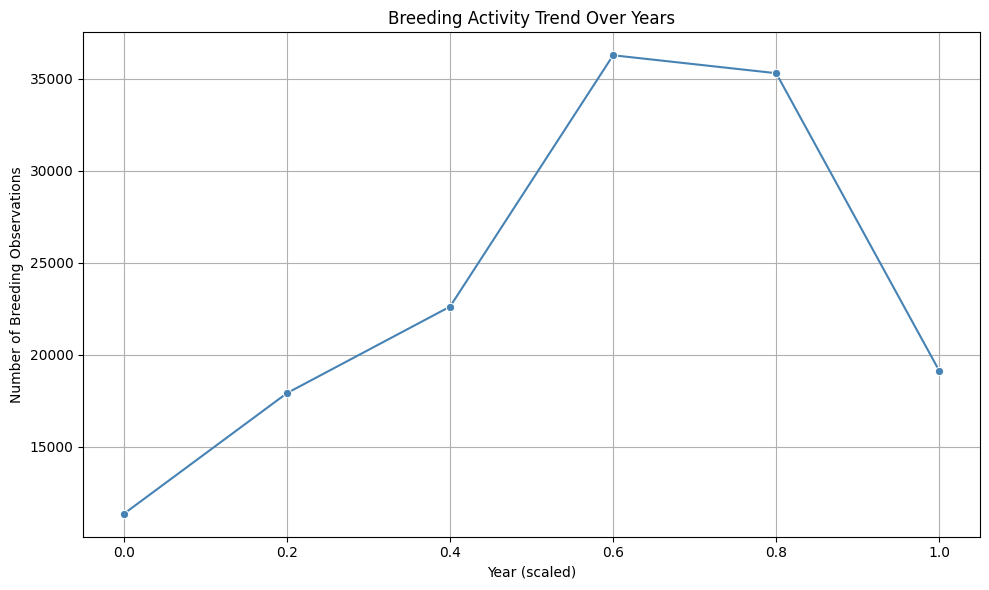

In [32]:
# <---Visulaiztion 2-->
# Group by Year and sum breeding observations
yearly_breeding = (
    breeding_bird_atlas_preprocessed.groupby('Year')['Breeding_Binary']
    .sum()
    .reset_index()
)
yearly_breeding.columns = ['Year', 'Breeding_Count']
print(yearly_breeding)
plt.figure(figsize=(10,6))
sns.lineplot(data=yearly_breeding, x='Year', y='Breeding_Count', marker='o', color='steelblue')
plt.xlabel('Year (scaled)')
plt.ylabel('Number of Breeding Observations')
plt.title('Breeding Activity Trend Over Years')
plt.grid(True)
plt.tight_layout()
plt.show()
# This visualization shows the
# trend of breeding bird observations over time,
# highlighting how the number of breeding records changes across years.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361582 entries, 0 to 361581
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   Block ID                   361582 non-null  category
 1   Map Link                   361582 non-null  category
 2   County                     361582 non-null  object  
 3   Common Name                361582 non-null  category
 4   Scientific Name            361582 non-null  category
 5   NYS Protection Status      361582 non-null  category
 6   Family Name                361582 non-null  category
 7   Family Description         361582 non-null  category
 8   Breeding Behavior          361582 non-null  category
 9   Month                      361582 non-null  float64 
 10  Day                        361582 non-null  float64 
 11  Year                       361582 non-null  float64 
 12  Breeding Status            361582 non-null  category
 13  Breeding_Binar

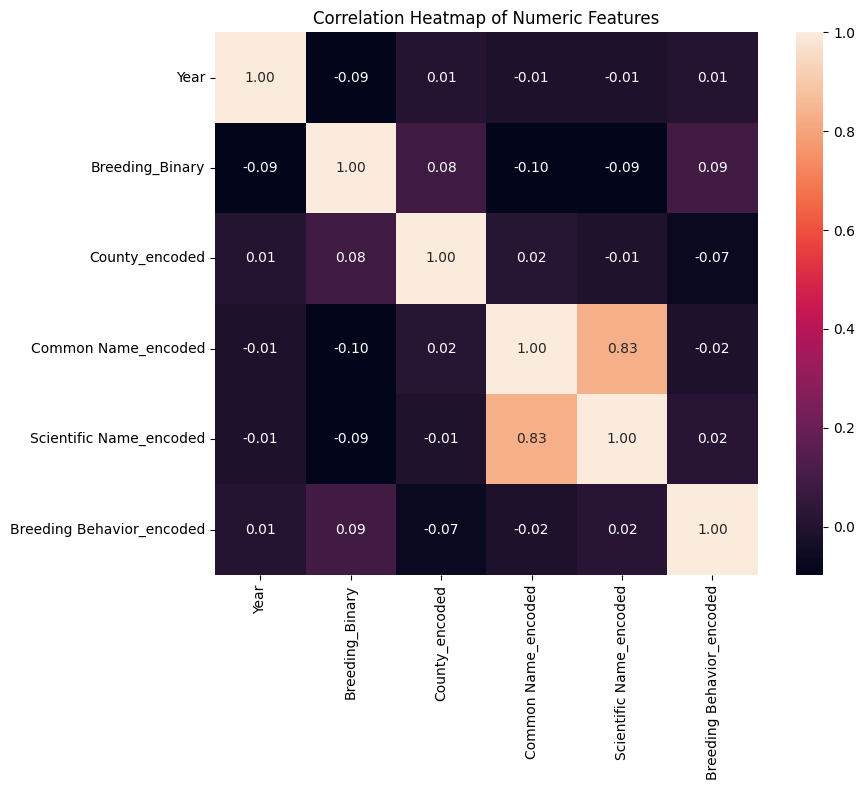

In [33]:
# <---Visulaiztion 3-->
breeding_bird_atlas_preprocessed.info()

# Select only numeric columns
numeric_df = breeding_bird_atlas_preprocessed.select_dtypes(include=['int64', 'float64'])

# Dropping Month and Day columns as these have no correlation with other columns
numeric_df = numeric_df.drop(columns=['Month', 'Day'])

# Verify
print(numeric_df.head())


# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cbar=True, square=True)
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()
# This heatmap shows the
# correlation between numeric features in the dataset (excluding Month and Day),
# helping identify strong positive or negative relationships among variables
# such as breeding indicators and encoded categorical features.

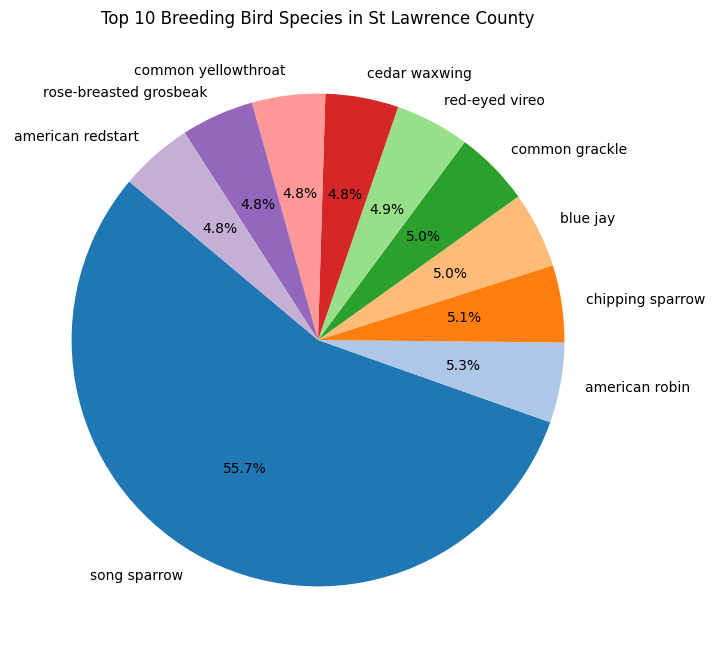

In [34]:
# <---Visulaiztion 4-->
# Pie chart of Most Common Species in a Specific County
county_name = 'St Lawrence'
species_counts = breeding_bird_atlas_preprocessed[breeding_bird_atlas_preprocessed['County'] == county_name]['Common Name'].value_counts().head(10)

plt.figure(figsize=(8,8))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title(f'Top 10 Breeding Bird Species in {county_name} County')
plt.show()

# This pie chart shows top 10 breeding bird in the choosen speific county.

NYS Protection Status
Protected                    305070
Game Species                  23503
Unprotected                   12020
Protected-Special Concern      9206
Threatened                     2255
Endangered                      269
Name: count, dtype: int64


/tmp/ipython-input-901034840.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


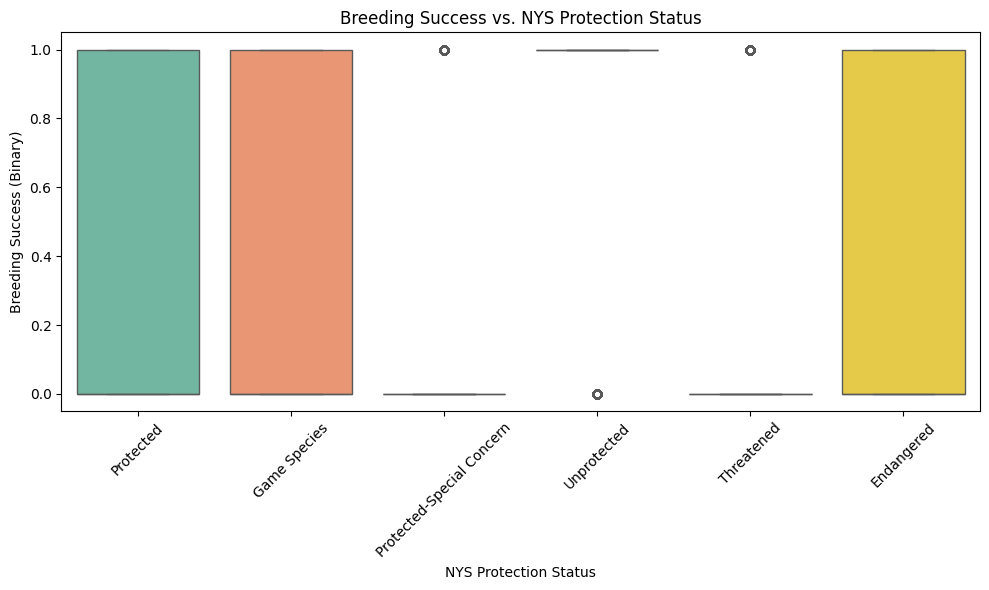

In [35]:
# <---Visulaiztion 5 -->
plt.figure(figsize=(10,6))
breeding_bird_atlas_preprocessed['NYS Protection Status'] = (
    breeding_bird_atlas_preprocessed['NYS Protection Status']
    .astype(str)              # Ensure strings
    .str.replace('\xa0', ' ') # Remove weird non-breaking spaces
    .str.strip()              # Remove leading/trailing spaces
    .str.title()              # Consistent capitalization
    .str.replace(r'\d+', '', regex=True)  # Remove digits

)

# Keeping only rows where the column is NOT empty
breeding_bird_atlas_preprocessed = breeding_bird_atlas_preprocessed[
    breeding_bird_atlas_preprocessed['NYS Protection Status'] != ''
]

status_counts = breeding_bird_atlas_preprocessed['NYS Protection Status'].value_counts()
print(status_counts)

# Box plot of Breeding_Binary by Protection Status
sns.boxplot(
    data=breeding_bird_atlas_preprocessed,
    x='NYS Protection Status',  # categorical variable
    y='Breeding_Binary',        # numeric/binary variable
    palette='Set2'
)

plt.xticks(rotation=45)
plt.xlabel('NYS Protection Status')
plt.ylabel('Breeding Success (Binary)')
plt.title('Breeding Success vs. NYS Protection Status')
plt.tight_layout()
plt.show()

# This box plot shows the distribution of
# breeding success (`Breeding_Binary`) across different NYS Protection Status categories,
# highlighting how protected and unprotected species differ in their breeding activity.
# It helps identify whether protection status is associated with higher or lower breeding occurrences.


### 5. Saving the dataset

In [36]:
breeding_bird_atlas_preprocessed.to_csv('breeding_bird_atlas_preprocessed', index=False)

## 6. Short Summary -->
* **Missing rows :** Filled missing values with **median for numeric columns** and **mode for categorical columns**.
* **Outliers:** Detected using **IQR (1.5×IQR rule)** and replaced with the **median**.
* **Encoded columns:** All categorical columns were **factorized** into numeric codes with a `_encoded` suffix.
* **Scaled numeric features:** All **float numeric columns** were scaled to the **0–1 range (min-max scaling)**.
* **Dropping features** with absolute correlation below 0.05 are considered insignificant and removed.



### Part II: Logistic Regression using Gradient Descent

1. Import required libraries


In [37]:
import pandas as pd
import numpy as np

2. Choose target variable Y - Wether a given wether given sample belongs to "Adelie" species or not. Adelie is marked as 0 after encoding in column "species_encoded".

3. Create the data matrices for X (input) and Y (target)

In [38]:
pipelined_penguins = df       #assign the variable to be df from Step 1

target_column = "species_encoded"

cat_cols = pipelined_penguins.select_dtypes(include=['category', 'object']).columns
pipelined_penguins = pipelined_penguins.drop(columns=cat_cols)


X = pipelined_penguins.drop(columns = [target_column]).values    #Nxd
#Target is wether given sample belongs to "Adelie" species or not
pipelined_penguins['binary_target'] = np.where(pipelined_penguins[target_column] == 0, 1, 0)
Y = pipelined_penguins['binary_target'].values                                  # N x 1






4. Split into train/test sets



In [39]:
#shuffling indices
np.random.seed(42)

N = X.shape[0]
indices = np.arange(N)
np.random.shuffle(indices)

split_index = int(0.8 * N)

#train and test data split 80-20
train_data_id = indices[:split_index]
test_data_id = indices[split_index:]

X_train = np.array(X[train_data_id], dtype=np.float64)
X_test = np.array(X[test_data_id], dtype=np.float64)
y_train = np.array(Y[train_data_id], dtype=np.float64)
y_test = np.array(Y[test_data_id], dtype=np.float64)

5. define logistic regression:

In [40]:
class LogitRegression():
    results = {}
    def __init__(self, learning_rate = 0.01, num_of_iter = 100000):
        self.learning_rate = learning_rate
        self.num_of_iter = num_of_iter
        self.loss = []

    def sigmoid(self, z):
        y_hat = 1/(1+np.exp(-z))
        return y_hat

    def cost(self, y, y_hat):
        n = y.shape[0]

        #Avoiding log(0) issues as log(0) is undefined
        #keeps the values between epsilon and 1-epsilon
        epsilon = 1e-15
        y_hat = np.clip(y_hat, epsilon, 1 - epsilon)

        cost_val = (-1/n)*np.sum(y*np.log(y_hat)+ (1-y)* np.log(1-y_hat))

        return cost_val

    def gradient_descent(self, X, y, y_hat):

        n = X.shape[0]
        delta = y_hat - y
        dW = (1/n)*np.dot(X.T,delta)
        db = (1 / n) * np.sum(delta)
        return dW, db

    def fit(self, X, y):
        if y.ndim == 1:
            y = y.reshape(-1, 1)

        N, d = X.shape  # number of samples and number of features
        #initialisation wieghts and bias
        self.w = np.random.uniform(0, 1, size = (d,1))
        self.b = 0

        for i in range(self.num_of_iter):
            z = np.dot(X, self.w) + self.b
            y_hat = self.sigmoid(z)
            dw, db = self.gradient_descent(X, y, y_hat)
            cost = self.cost(y, y_hat)
            self.loss.append(cost)

            #update rule for wieghts and bias
            self.w -= self.learning_rate*dw
            self.b -= self.learning_rate*db


    def predict(self, X):
        z = np.dot(X, self.w) + self.b
        y_hat = self.sigmoid(z)
        return (y_hat >= 0.5).astype(int).flatten()


6. Train the model:

In [41]:
models = [
    LogitRegression(learning_rate=1e-3, num_of_iter=10000),
    LogitRegression(learning_rate=4e-2, num_of_iter=50000),
    LogitRegression(learning_rate=5e-4, num_of_iter=150000)
]

# Train all models
for i, model in enumerate(models):
    print(f"\n Training Model {i+1}...")
    model.fit(X_train, y_train)


 Training Model 1...

 Training Model 2...

 Training Model 3...


7. Evaluate performance:

Precision, Recall, F1-score, Confusion Matrix

In [42]:
def evaluate_metrics(y_true, y_pred):

    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    accuracy = (TP + TN) / (TP + TN + FP + FN)

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0

    recall = TP / (TP + FN) if (TP + FN) > 0 else 0

    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    confusion_mat = np.array([[TN, FP], [FN, TP]])
    print("\nConfusion Matrix:")
    print(confusion_mat)

    return accuracy, precision, recall, f1_score

for i, model in enumerate(models):
    print("Evaluating Model", i+1)
    y_pred_test = model.predict(X_test)

    accuracy, precision, recall, f1 = evaluate_metrics(y_test, y_pred_test)

    print("Accuracy: " , (accuracy*100),"%")
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score",f1)

Evaluating Model 1

Confusion Matrix:
[[41  1]
 [15 12]]
Accuracy:  76.81159420289855 %
Precision: 0.9230769230769231
Recall: 0.4444444444444444
F1-score 0.6
Evaluating Model 2

Confusion Matrix:
[[39  3]
 [ 0 27]]
Accuracy:  95.65217391304348 %
Precision: 0.9
Recall: 1.0
F1-score 0.9473684210526316
Evaluating Model 3

Confusion Matrix:
[[40  2]
 [ 4 23]]
Accuracy:  91.30434782608695 %
Precision: 0.92
Recall: 0.8518518518518519
F1-score 0.8846153846153846


8. Plot and analyze loss curves

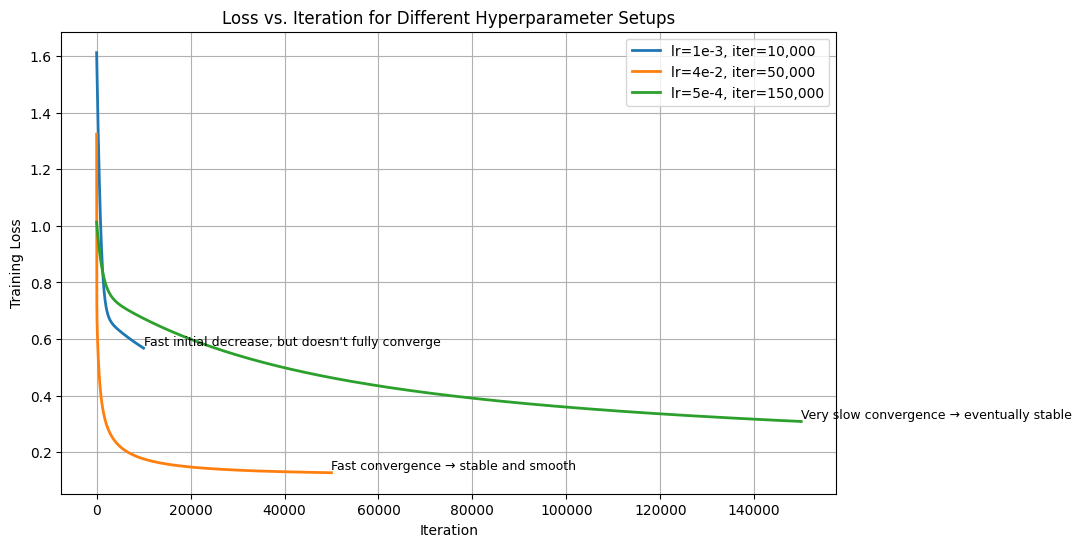

In [43]:
# Short descriptions for convergence behavior
descriptions = [
    "Fast initial decrease, but doesn't fully converge",
    "Fast convergence → stable and smooth",
    "Very slow convergence → eventually stable"
]
# Plotting the loss curves
labels = [
    "lr=1e-3, iter=10,000",
    "lr=4e-2, iter=50,000",
    "lr=5e-4, iter=150,000"
]
plt.figure(figsize=(10, 6))
for i, model in enumerate(models):
    itr = range(1, len(model.loss) + 1)
    plt.plot(itr, model.loss, label=labels[i], linewidth=2)
    # Position annotation near the last point of the curve
    last_x = itr[-1]
    last_y = model.loss[-1]
    # Plotting the loss curve with description
    plt.text(last_x, last_y, f"\n{descriptions[i]}",
             fontsize=9, verticalalignment='bottom', horizontalalignment='left')

plt.xlabel("Iteration")
plt.ylabel("Training Loss")
plt.title("Loss vs. Iteration for Different Hyperparameter Setups")
plt.legend()
plt.grid(True)
plt.show()

### 8. Model Loss curve description -->
1. Blue line (lr = 1e-3, iter = 10,000) --> the loss descrease rapidly, but then flattens out relativley very fast.
2. Orange line (lr = 4e-2, iter = 50,000) -->  the loss descrease rapidly, but then stabilizes quickly and remains at a relatively low value.
3. Green line (lr = 5e-4, iter = 150,000) --> the loss descrease gradually,
over a long period and eventually becomes stable.

###  learning rate and iterations influence convergence and accuracy -->
1. The learning rate of (lr = 1e-3) led to fast but unstable convergance, leading to low accuracy.
2. The moderate learning rate of (lr = 4e-2) led to faster convergance with, highest accuracy.
3. The low learning rate of (lr = 5e-4) led to slow convergance, taking more time, and eventually reaching a good accuracy.

## 9. Save the weights of the model, that returns the highest accuracy in a pickele file.

In [44]:
import pickle
accuracies = []
for i, model in enumerate(models):
    print("Evaluating Model", i+1)
    y_pred_test = model.predict(X_test)

    accuracy, precision, recall, f1 = evaluate_metrics(y_test, y_pred_test)
    accuracies.append(accuracy)

    # Identify the best model
    best_model_id = np.argmax(accuracies)
    best_model = models[best_model_id]

    # Prepare weights for saving the info with model
    weights_data = {
    'weights': best_model.w,
    'bias': best_model.b,
    'learning_rate': best_model.learning_rate,
    'num_itr': best_model.num_of_iter
    }

filename = "a1_part_2_weights_rverma2_dikshant.pkl"
with open(filename, 'wb') as f:
  pickle.dump(weights_data, f)

print(f"Weights successfully saved to {filename}")

Evaluating Model 1

Confusion Matrix:
[[41  1]
 [15 12]]
Evaluating Model 2

Confusion Matrix:
[[39  3]
 [ 0 27]]
Evaluating Model 3

Confusion Matrix:
[[40  2]
 [ 4 23]]
Weights successfully saved to a1_part_2_weights_rverma2_dikshant.pkl


### 10. Discussion
1. best-performing hyperparameters ((lr = 4e-2, iter = 50,000))  worked best for us as the learning rate is high, which allowed model to converge quickly but not that high, so that it misses the optimal solution.

2. Summarize the advantages and drawbacks of logistic regression  -->

Advantages -->

     a. Simple and easy to use.

     b. Its efficient for linearly separable data.

     c. Fast and requires less computation.

Disadvantages -->

     a.  Struggles with non linear data.

     b.  Its senstive to feature scaling.
     
     c.  Can cause overfitting with too many features.

Issues faced:

1. Generalising dropping coulumns while creating pipeline as each dataset and related problem we aim to solve will be different and we may loose important features.

2. Creating LogitRegression was tricky especially the interpretation and subsequent implementation of different mathamatical formulaes.

3. During visualization faced issue with plotting points for example in the emission dataset year collumn got scaled after passing it through the pipeline which made it diffcult for us to plot the Visualization correctly.

4. Also during visulization for example in the breeding_bird dataset, the county column contained values, like string "99","" which were not properly handled by perprocessing pipeline that also created problem in plotting.


11.Refreneces used:

1.   https://www.geeksforgeeks.org/machine-learning/box-plot
2.   https://www.geeksforgeeks.org/python/countplot-using-seaborn-in-python/
3. https://www.geeksforgeeks.org/python/boxplot-using-seaborn-in-python/
4. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
5. https://www.geeksforgeeks.org/python/choropleth-maps-using-plotly-in-python/
6. https://scikit-learn.org/stable/visualizations.html
7. https://www.sciencedirect.com/science/article/pii/S2468502X20300358
8. https://www.geeksforgeeks.org/python/python-pretty-print-a-dictionary-with-dictionary-value/
9. https://www.geeksforgeeks.org/machine-learning/confusion-matrix-machine-learning/#


### Part III: Linear & Ridge Regressions using OLS

1. Import required libraries

2. Data analysis & preprocessing

In [45]:
df_white_wine = pd.read_csv('/content/drive/MyDrive/winequality-white.csv', sep=';')
df_red_wine = pd.read_csv('/content/drive/MyDrive/winequality-red.csv', sep=';')

print("Are columns same: ", df_white_wine.columns.equals(df_red_wine.columns))
print("Shape of white wine df ",df_white_wine.shape)

print("Shape of red wine df ",df_red_wine.shape)

#adding a column in each to indicate wether a wine is white or red.
df_white_wine['wine_type'] = 'white'
df_red_wine['wine_type'] = 'red'

df_wine = pd.concat([df_white_wine, df_red_wine], ignore_index=True)
print("Shape of combined wine df ",df_wine.shape)
df_wine['wine_type'] = df_wine['wine_type'].astype('category')

def preprocess_without_scaling(df, target='quality'):
    df, summary_missing = handle_missing_values(df)
    df, summary_cleaning = cleaning_strings(df)
    df, summary_outliers = outliers_detection_treatment(df)
    df, summary_encoded = encode_catagorical(df)
    cat_cols = df.select_dtypes(include=['category', 'object']).columns
    df = df.drop(columns=cat_cols)
    df, summary_dropped = drop_features(df, target)
    summary_all = {**summary_missing, **summary_cleaning,
                   **summary_outliers, **summary_encoded, **summary_dropped}

    return df, summary_all

target_column = "alcohol"

df_wine_processed, summary_pre_scaling = preprocess_without_scaling(df_wine, target= target_column)
print_summary(summary_pre_scaling)

X = df_wine_processed.drop(columns = [target_column]).values    #Nxd
#Target is alcohol
Y = df_wine_processed[target_column].values                     # N x 1


# Describing the dataset - There are two datasets of wine, one is of red wine and the other is of white wine. Both
# contain the same column names and thereafter we merge them both. The df contains mostly integer values defining
# several parameters related to wines such as ph, acidity, residual sugar, etc. The total number of samples in white
# wine csv are 4898 and that of red wine are 1599. After combining both, the total number of samples come out to be
# 6497. We have chosen the target to be the alochol % named as column alcohol.

Are columns same:  True
Shape of white wine df  (4898, 12)
Shape of red wine df  (1599, 12)
Shape of combined wine df  (6497, 13)

===== PREPROCESSING SUMMARY =====

--- Missing Values ---
fixed acidity: {'missing_count': 0, 'strategy': 'mean'}
volatile acidity: {'missing_count': 0, 'strategy': 'mean'}
citric acid: {'missing_count': 0, 'strategy': 'mean'}
residual sugar: {'missing_count': 0, 'strategy': 'mean'}
chlorides: {'missing_count': 0, 'strategy': 'mean'}
free sulfur dioxide: {'missing_count': 0, 'strategy': 'mean'}
total sulfur dioxide: {'missing_count': 0, 'strategy': 'mean'}
density: {'missing_count': 0, 'strategy': 'mean'}
pH: {'missing_count': 0, 'strategy': 'mean'}
sulphates: {'missing_count': 0, 'strategy': 'mean'}
alcohol: {'missing_count': 0, 'strategy': 'mean'}
quality: {'missing_count': 0, 'strategy': 'mean'}
wine_type: {'missing_count': 0, 'strategy': 'mode'}

--- String Cleaning ---
(None)

--- Outliers Handled ---
fixed acidity: 357
volatile acidity: 377
citric aci

3. Divide into train and test

In [46]:
#splitting
np.random.seed(45)

N = X.shape[0]
indices = np.arange(N)
np.random.shuffle(indices)

split_index = int(0.8 * N)

#train and test data split 80-20
train_data_id = indices[:split_index]
test_data_id = indices[split_index:]

X_train = np.array(X[train_data_id], dtype=np.float64)
X_test = np.array(X[test_data_id], dtype=np.float64)
y_train = np.array(Y[train_data_id], dtype=np.float64)
y_test = np.array(Y[test_data_id], dtype=np.float64)

#scaling after splitting
min_val = X_train.min(axis=0)
max_val = X_train.max(axis=0)

scale = max_val - min_val
scale[scale == 0] = 1
X_train = (X_train - min_val) / scale
X_test = (X_test - min_val) / scale

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5197, 8)
(1300, 8)
(5197,)
(1300,)


Linear Regression using OLS


Train MSE: 0.5197340787548872
Train R²: 0.6350686550576599
Test MSE: 0.47955672527566634
Test R²: 0.6520242877093869


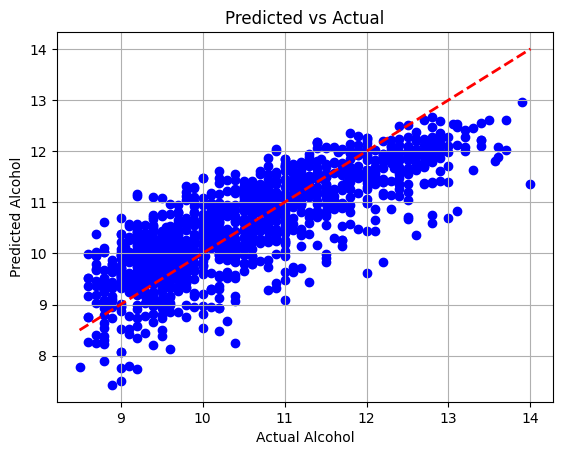

In [47]:
# Add bias term
X_train_bias = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_test_bias = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

# OLS equation
XtX = np.dot(X_train_bias.T, X_train_bias)
XtX_inv = np.linalg.inv(XtX)
XtY = np.dot(X_train_bias.T, y_train)
w = np.dot(XtX_inv, XtY)

y_train_pred = np.dot(X_train_bias, w)
y_test_pred = np.dot(X_test_bias, w)

def mean_squared_error(y, y_pred):
    return np.mean((y - y_pred) ** 2)

def r2_score(y, y_pred):
    num = np.sum((y - y_pred) ** 2)
    den = np.sum((y - np.mean(y)) ** 2)
    return 1 - num / den

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Train MSE: {mse_train}")
print(f"Train R²: {r2_train}")
print(f"Test MSE: {mse_test}")
print(f"Test R²: {r2_test}")


plt.scatter(y_test, y_test_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Alcohol')
plt.ylabel('Predicted Alcohol')
plt.title('Predicted vs Actual')
plt.grid(True)
plt.show()


 5. Ridge Regression using OLS:

for λ= 0.01
Train MSE:  0.519734092532309
Test MSE:  0.47955701992778044
Train R²:  0.6350686453838414
Test R²:  0.6520240739040666
-----------------------------------


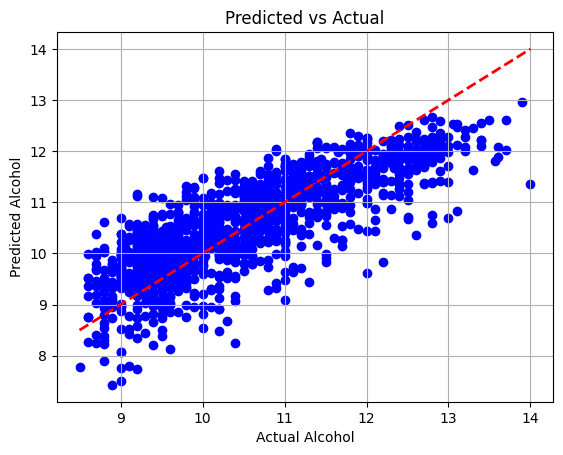

for λ= 0.1
Train MSE:  0.5197354499993991
Test MSE:  0.47956088308682954
Train R²:  0.6350676922381635
Test R²:  0.6520212707205204
-----------------------------------


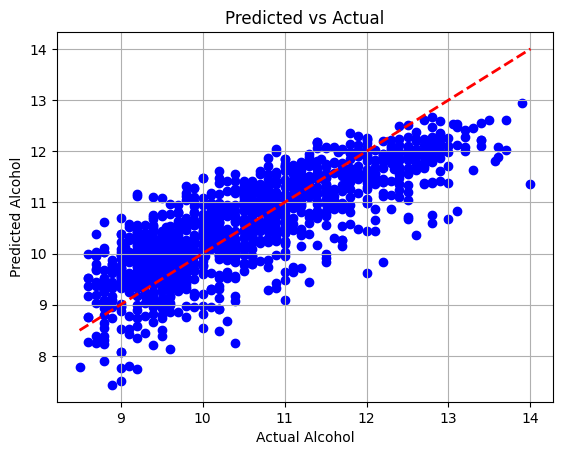

for λ= 1
Train MSE:  0.5198649604460421
Test MSE:  0.4797133312339499
Train R²:  0.6349767564627169
Test R²:  0.6519106513718894
-----------------------------------


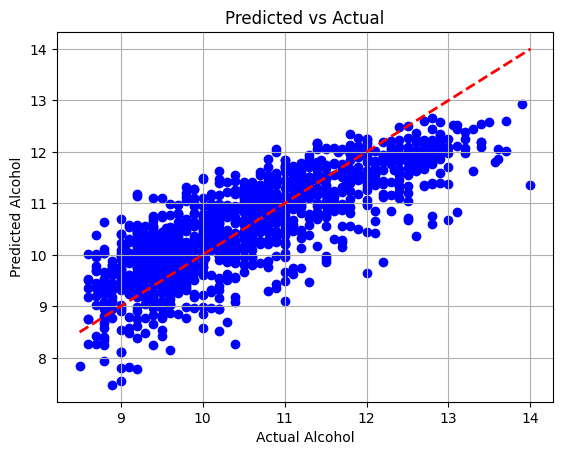

for λ= 10
Train MSE:  0.5284319322324511
Test MSE:  0.48835317061219696
Train R²:  0.6289614562084272
Test R²:  0.6456414154228078
-----------------------------------


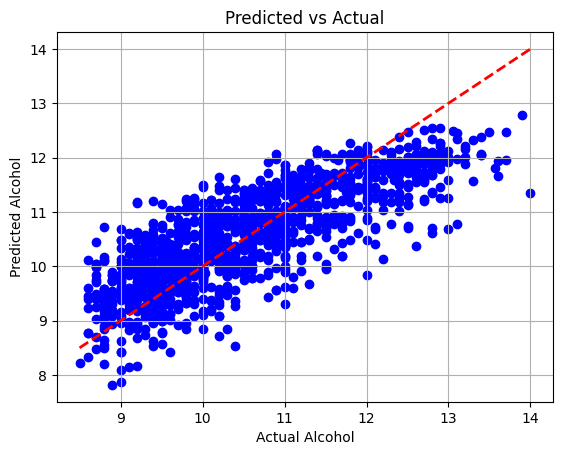

for λ= 100
Train MSE:  0.6476979321828228
Test MSE:  0.6050640019438239
Train R²:  0.545218820220325
Test R²:  0.5609537600858778
-----------------------------------


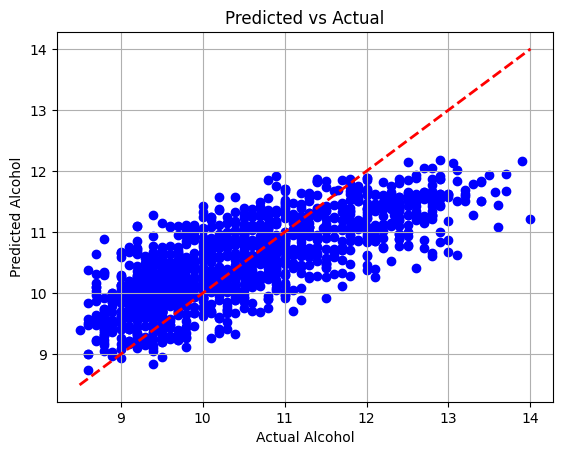

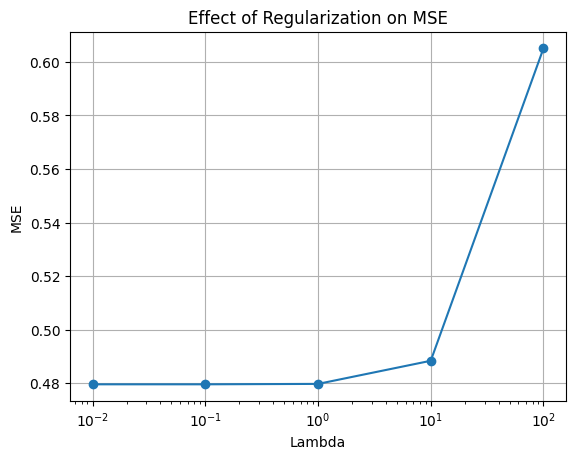

Best λ =  0.01  with Test MSE =  0.47955701992778044
Best Wieghts and lambda saved sucessfully!


In [48]:
lambdas = [0.01, 0.1, 1, 10, 100]
mse_list = []
weights_list = []

for lam in lambdas:
    number_features = X_train_bias.shape[1]
    I = np.eye(number_features)     #identity matrix
    I[0, 0] = 0

    XtX = np.dot(X_train_bias.T, X_train_bias)
    XtX_inv = np.linalg.inv(XtX + lam * I)
    XtY = np.dot(X_train_bias.T, y_train)
    w = np.dot(XtX_inv, XtY)

    weights_list.append(w)


    y_train_pred = np.dot(X_train_bias, w)
    y_test_pred = np.dot(X_test_bias, w)

    mse_train = mean_squared_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)

    mse_list.append(mse_test)

    print("for λ=",lam)
    print("Train MSE: ",mse_train)
    print("Test MSE: ",mse_test)
    print("Train R²: ",r2_train)
    print("Test R²: ",r2_test)
    print('-'*35)

    plt.scatter(y_test, y_test_pred, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Alcohol')
    plt.ylabel('Predicted Alcohol')
    plt.title('Predicted vs Actual')
    plt.grid(True)
    plt.show()


print('\n','\n')


plt.figure()
plt.plot(lambdas, mse_list, marker='o')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.title('Effect of Regularization on MSE')
plt.grid(True)
plt.show()

best_mse_id = np.argmin(mse_list)
best_lambda = lambdas[best_mse_id]
best_w = weights_list[best_mse_id]

print("Best λ = ",best_lambda," with Test MSE = ",mse_list[best_mse_id])

best_params = {
    "lambda": best_lambda,
    "weights": best_w
}

filename = "a1_part_3_weights_dikshant_rverma2.pkl"
with open(filename, "wb") as f:
    pickle.dump(best_params, f)

print("Best Wieghts and lambda saved sucessfully!")



6. Discussions


A).  Advantages and drawback of using OLS:

1.   Advantages:

*   Fast and efficient weight calculation for smaller datasets
*   No hyperparametrs required hence no hypermeter tuning.


2.   Drawbacks:


*   Sensitive to outliers in the data
*   Inefficient when there are too many features in dataset.

B). Advantages and drawback of Linear Regression:

1.   Advantages:
*   Simple to implement and understand the output.
*   Overfitting can be avoided by simple reguralisation methods such as ridge or lasso.
*   Robust to outliers in the data.





2.   Drawbacks:

*   Tries to create a linear relationship between dependent and independent variables which is not always the case with real world data relationships.
*   Highly correlated features makes it difficult to make a linear relationship

C). **Ridge Regression** helps as it direclty affects the weight calculation in OLS by adding a penalty term to it. For each large wieght, a penalty is added and hence our calculations are less susceptible to noise of the data. This helps the model to create a better generalised behaviour so that it does not overfit. In general, as the bias increases, the variance decreases which means when lambda is small (ex lam = 0.01), the weights are calculated like simple OLS. When the bias is increased, the variance is decreased and our model behaves better for a generalised solution if it was overfitting before.

D). For our model, adding regularisation did not have much effect to the model as the dataset did not contain a lot of noise due to data pre-processing. Hence, the model created using OLS did not overfit. Therefore, using smaller values of lambda such as 0.1 help the model but larger values (ex. 10) degrade the performance of our model


References Part 3:

*   https://builtin.com/data-science/ols-regression
*   https://www.geeksforgeeks.org/machine-learning/ml-advantages-and-disadvantages-of-linear-regression/

*   https://share.google/images/cEQ0mfGTc8abN0sJx






# Part IV: Elastic Net Regression using Gradient Descent

1. Data analysis & preprocessing  Steps (2,3,4) covered

In [49]:
dataset_3= pd.read_csv("/content/drive/MyDrive/diamond.csv")

# Showing the first 5 rows of the dataset
print("Before Preprocessing\n")
print(dataset_3.head(),'\n')
print("Shape of the dataset:")
print(dataset_3.shape,'\n')
print("Data types of the dataset:")
print(dataset_3.dtypes,'\n')
print(dataset_3.info())

Before Preprocessing

  Unnamed: 0 carat      cut color clarity  average us salary  \
0          1  0.23    Ideal     E     SI2              31282   
1          2  0.21  Premium     E     SI1              40049   
2          3  0.23     Good     E     VS1              33517   
3          4  0.29  Premium     I     VS2              38495   
4          5  0.31     Good     J     SI2              34178   

   number of diamonds mined (millions) depth table price     x     y     z  
0                                 5.01  61.5    55   326  3.95  3.98  2.43  
1                                 1.69  59.8    61   326  3.89  3.84  2.31  
2                                 3.85  56.9    65   327  4.05  4.07  2.31  
3                                 3.49  62.4    58   334   4.2  4.23  2.63  
4                                 4.70  63.3    58   335  4.34  4.35  2.75   

Shape of the dataset:
(53940, 13) 

Data types of the dataset:
Unnamed: 0                              object
carat              

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
# Check unique values in Breeding Status
print(dataset_3['price'].value_counts())

# Remove any symbols under price and convert to float
dataset_3['price'] = dataset_3['price'].str.replace(r'[$,]', '', regex=True)

dataset_3['price'] = pd.to_numeric(dataset_3['price'], errors='coerce')
print(dataset_3['price'].dtype)
dataset_3.drop(columns=['Unnamed: 0'], inplace=True)

print(dataset_3.info())

price
MAYBE    180
TRUE     173
FALSE    160
605      131
828      122
        ... 
342        1
340        1
339        1
338        1
337        1
Name: count, Length: 11443, dtype: int64
float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   carat                                52430 non-null  object 
 1   cut                                  52647 non-null  object 
 2   color                                52428 non-null  object 
 3   clarity                              53587 non-null  object 
 4   average us salary                    53940 non-null  int64  
 5   number of diamonds mined (millions)  53940 non-null  float64
 6   depth                                53246 non-null  object 
 7   table                                52398 non-null  object 
 8   price                       

In [52]:
# Used the Monkey patching trick in python
# Save the original scale_numeric function
original_scale_numeric = scale_numeric

target_2='price'

# Override it temporarily with a dummy version created that will just return the dataset without scalling
def scale_numeric(dataset_3):
    return dataset_3, {"Scaling": "Skipped via override"}

def drop_features(dataset_3,target_2):
    columns_to_drop = ['Unnamed: 0', 'cut', 'color', 'depth', 'table']  # original raw categorical columns
    # Keep the encoded ones
    columns_to_drop = [col for col in columns_to_drop if col in dataset_3.columns and col != target]

    dataset_3.drop(columns=columns_to_drop, axis=1, inplace=True)
    return dataset_3, {"Dropped Columns": columns_to_drop}

# Step 3: Run preprocessing (this will now skip scaling part as we want to do the scaling after train/test split)
diamond_preprocessed = preprocess_df(dataset_3, target='price')

# Check the result of preprocessed
print(diamond_preprocessed.head())

# Restore the original function
scale_numeric = original_scale_numeric

# About the dataset
print("\n", diamond_preprocessed.info())
# For this task I have choosen diamond dataset, this dataset provides info regarding diamonds,
# contains 53940 samples, it has 20 columns in total, it has 10 category columns, and 9 label encoded columns,
# for this task I have taken price_Binary as my target column.



===== PREPROCESSING SUMMARY =====

--- Missing Values ---
carat: {'missing_count': 1510, 'strategy': 'mode'}
cut: {'missing_count': 1293, 'strategy': 'mode'}
color: {'missing_count': 1512, 'strategy': 'mode'}
clarity: {'missing_count': 353, 'strategy': 'mode'}
average us salary: {'missing_count': 0, 'strategy': 'mean'}
number of diamonds mined (millions): {'missing_count': 0, 'strategy': 'mean'}
depth: {'missing_count': 694, 'strategy': 'mode'}
table: {'missing_count': 1542, 'strategy': 'mode'}
price: {'missing_count': 2096, 'strategy': 'mean'}
x: {'missing_count': 1526, 'strategy': 'mode'}
y: {'missing_count': 1221, 'strategy': 'mode'}
z: {'missing_count': 1433, 'strategy': 'mode'}

--- String Cleaning ---
carat, cut, color, clarity, depth, table, x, y, z

--- Outliers Handled ---
average us salary: 0
number of diamonds mined (millions): 0
price: 3694

--- Encoded Columns ---
carat_encoded, cut_encoded, color_encoded, clarity_encoded, depth_encoded, table_encoded, x_encoded, y_encode

/tmp/ipython-input-2405034720.py:49: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '39547.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[outliers_exists, col] = df[col].median()


In [53]:
print(diamond_preprocessed.isnull().sum())

carat                                  0
clarity                                0
average us salary                      0
number of diamonds mined (millions)    0
price                                  0
x                                      0
y                                      0
z                                      0
carat_encoded                          0
cut_encoded                            0
color_encoded                          0
clarity_encoded                        0
depth_encoded                          0
table_encoded                          0
x_encoded                              0
y_encoded                              0
z_encoded                              0
dtype: int64


In [54]:
# Train/test split
target_column = "price"
# Keep all numeric columns except the target
feature_cols = [col for col in diamond_preprocessed.columns
                if diamond_preprocessed[col].dtype in [np.int64, np.float64]
                and col != target_column]
# Separate X (features) and Y (target)
# this will be all numeric only
X = diamond_preprocessed[feature_cols].values
Y = diamond_preprocessed[[target_column]].values

# Check that these columns exist
print("Features:", feature_cols)
print("Target:", target_column)

#splitting
np.random.seed(42)
indices = np.random.permutation(X.shape[0])
print(indices)
# Splitting dataset into 80 and 20
train_size = int(0.8 * X.shape[0])

# Taking first 80% of shuffled indices
train_idx = indices[:train_size]
# Taking the last 20% of the shuffled indices
test_idx=indices[train_size:]

X_train = X[train_idx]
X_test = X[test_idx]
Y_train = Y[train_idx]
Y_test = Y[test_idx]

# scaling after splitting
def min_max_scale(train,test):
  min_val = train.min(axis=0)
  max_val = train.max(axis=0)
  scale = max_val - min_val
  scale[scale == 0] = 1
  X_train_scaled = (train - min_val) / scale
  X_test_scaled = (test - min_val) / scale
  return X_train_scaled, X_test_scaled, {"min": min_val, "max": max_val}

X_train , X_test, scaling_info = min_max_scale(X_train, X_test)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

Features: ['average us salary', 'number of diamonds mined (millions)', 'carat_encoded', 'cut_encoded', 'color_encoded', 'clarity_encoded', 'depth_encoded', 'table_encoded', 'x_encoded', 'y_encoded', 'z_encoded']
Target: price
[ 1388 50052 41645 ... 38158   860 15795]
X_train shape: (43152, 11)
X_test shape: (10788, 11)
Y_train shape: (43152, 1)
Y_test shape: (10788, 1)


# 4. Elastic Net Regularization

Elastic Net combines L1 (Lasso) and L2 (Ridge) regularization. Steps 4,5 covered

In [55]:
# --------- 1. Loss Function with Elastic Net Regularization --------- #

def compute_loss(X, y, w, lambda1=0.1, lambda2=0.1):
    N = X.shape[0]
    predictions = np.dot(X, w)
    # Mean Squared Error
    mse = (1 / (2 * N)) * np.sum((y - predictions) ** 2)
    # L2 (Ridge)
    l2 = (lambda1 / 2) * np.sum(w ** 2)
    # L1 (Lasso)
    l1 = lambda2 * np.sum(np.abs(w))
    return mse + l2 + l1

# --------- 2. Implemented Gradient Descent to minimize the Elastic Net regularized loss function --------- #

def gradient_descent_elastic_net(
    X, y, lr=0.01, lambda1=0.1, lambda2=0.1,
    max_iter=10000, init_type='xavier', stop_criterion='iterations', grad_tol=1e-6):
    """
    Performs gradient descent for Elastic Net regularization.

    Parameters:
        X (numpy array): Feature matrix (N x d)
        y (numpy array): Target vector (N x 1)
        lr (float): Learning rate
        lambda1 (float): L2 regularization strength
        lambda2 (float): L1 regularization strength
        max_iter (int): Max iterations
        init_type (str): 'zeros', 'random', or 'xavier'
        stop_criterion (str): 'iterations' or 'grad'
        grad_tol (float): Gradient norm threshold
        If the gradient becomes very small (less than 1e-6), stop training early
    Returns:
        w: Trained weight vector
        loss_history: List of loss values over iterations
    """
    N, d = X.shape
    # weight vector initialized based on your choice:
    # All zeros
    # Random values
    # Xavier initialization (smart way for fast/consistent convergence)
    w = initialize_weights(init_type, d)  # Weight shape (d, 1)

    # Storing loss history for plotting
    loss_history = []
    # Each loop = one training step, updating weights to reduce the loss
    for i in range(max_iter):
        predictions =  predictions = np.dot(X, w)             # shape: (N, 1)
        error = predictions - y          # shape: (N, 1)

        # Compute gradients
        grad_mse = (1 / N) * np.dot(X.T, error)           # d x 1
        grad_l2 = lambda1 * w                            # d x 1
        grad_l1 = lambda2 * np.sign(w)                   # d x 1 (subgradient for L1)

        grad = grad_mse + grad_l2 + grad_l1              # total gradient

        # Save loss for plotting loss curve to understand convergance
        loss = compute_loss(X, y, w, lambda1, lambda2)
        loss_history.append(loss)

        # Early stopping based on gradient norm
        if stop_criterion == 'grad':
            if np.linalg.norm(grad) < grad_tol:
                print(f"Stopped early at iteration {i}, gradient norm below threshold.")
                break

        # Update weights
        w = w - lr * grad

    return w, loss_history

# --------- 3. Weight Initialization Methods --------- #

def initialize_weights(method, input_dim, output_dim=1):
    if method == 'zeros':
        return np.zeros((input_dim, output_dim))
    elif method == 'random':
        return np.random.randn(input_dim, output_dim) * 0.01
    elif method == 'xavier':
        limit = np.sqrt(6 / (input_dim + output_dim))
        return np.random.uniform(-limit, limit, (input_dim, output_dim))
    else:
        raise ValueError("Unknown initialization method provided.")

6 (d). Discuss and analyze. Which method converged faster? Which was more stable?
How initialization affects:
• Speed of convergence
• Final loss
• Stability of training


Training with zeros initialization 


Training with random initialization 


Training with xavier initialization 



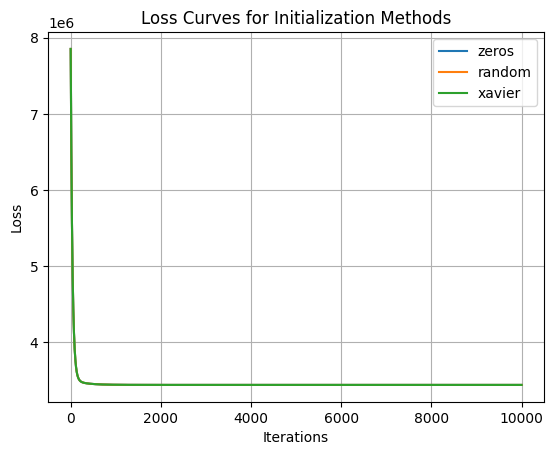

In [56]:
weight_init_methods = ['zeros', 'random', 'xavier']

for method in weight_init_methods:
    print(f"\nTraining with {method} initialization \n")
    w_early, loss_early = gradient_descent_elastic_net(
    X_train, Y_train,
    lr=0.01,
    lambda1=0.1,
    lambda2=0.1,
    max_iter=10000,
    init_type=method,
    stop_criterion='grad',
    grad_tol=1e-6      # stop when gradient < 0.000001
)


    plt.plot(loss_early, label=f"{method}")

plt.title("Loss Curves for Initialization Methods")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# <--Various intialization effect analysis --->
# 1)  Zero initialization speed of convergence was slow, final loss was similar to random and xavier,
# also it was very stable.
# 2) Random intialization speed of convergence was fast, final loss was similar to random and xavier, not that stable
# comapred to xavier and np.zeros
# 3) Xavier intialization speed of convergence was the fastest, final loss was similar to random and xavier,
# also it was very stable.


# 7. Experiment with training stopping criteria (≥2 methods)

 Method 1 – Fixed Iterations

In [57]:
w_fixed, loss_fixed = gradient_descent_elastic_net(
    X_train, Y_train,
    lr=0.01,
    lambda1=0.1,
    lambda2=0.1,
    max_iter=10000,
    init_type='xavier',
    stop_criterion='iterations'
)

Method 2 – Early Stopping using Gradient threshold

In [58]:
w_early, loss_early = gradient_descent_elastic_net(
    X_train, Y_train,
    lr=0.01,
    lambda1=0.1,
    lambda2=0.1,
    # high max, but will stop early
    max_iter=100000,
    init_type='xavier',
    stop_criterion='grad',
    grad_tol=1e-6
)

Stopped early at iteration 15272, gradient norm below threshold.


# 7 (c) Compare the performance and convergence behavior of these stopping criteria

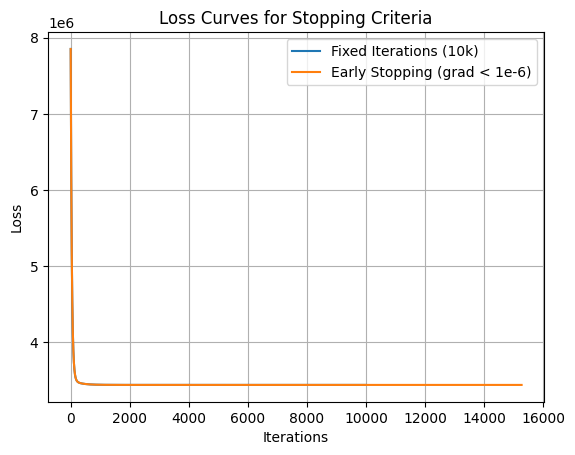

In [59]:
plt.plot(loss_fixed, label='Fixed Iterations (10k)')
plt.plot(loss_early, label='Early Stopping (grad < 1e-6)')
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss Curves for Stopping Criteria")
plt.legend()
plt.grid(True)
plt.show()

# Compare the performance and convergence behavior of these stopping criteria -->
On comparing the  two stopping criteria for gradient descent: fixed iterations (10,000) and early stopping based on gradient threshold (1e-6).
Both the approaches reached similar final loss of approx (0.22), depecting convergence to the same solution.
But the early stopping achieved this in far fewer number of iterations, making it computationally more efficient.
Neither method showed signs of instability or overfitting, but early stopping is preferred due to faster convergence and efficiency.

7 (d). Early stopping saved significant amount of computation time by avoiding unnecessary iterations after convergence.


#7 (e). Saving the weights

In [60]:
# Saving the weights
# Save weights that returns the best results as a1_part_4_weights_TEAMMATE1_
# TEAMMATE2.pkl or .pickl

best_weights = w_early
filename = "a1_part_4_weights_dikshant_rverma2.pkl"

with open(filename, 'wb') as f:
    pickle.dump(best_weights, f)

# 8. Evaluation
  # 8 (a) Report metrics

In [61]:
def mean_squared_error(y_actual, y_pred):
    return np.mean((y_actual - y_pred) ** 2)

def r2_score(y_actual, y_pred):
    # RSS represents the residual sum of squares,
    rss = np.sum((y_actual - y_pred) ** 2)
    # TSS represents the total sum of squares.
    tss = np.sum((y_actual - np.mean(y_actual)) ** 2)
    return 1 - (rss / tss)

y_train_pred = np.dot(X_train, best_weights)
y_test_pred = np.dot(X_test, best_weights)

# Metrics for MSE and R^2
train_mse = mean_squared_error(Y_train, y_train_pred)
test_mse = mean_squared_error(Y_test, y_test_pred)

train_r2 = r2_score(Y_train, y_train_pred)
test_r2 = r2_score(Y_test, y_test_pred)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)
print("Train R² :", train_r2)
print("Test R² :", test_r2)

print("Weights:", best_weights)

Train MSE: 6145698.02513232
Test MSE: 6136490.934846074
Train R² : 0.05574248878786747
Test R² : 0.06509294768091334
Weights: [[ 873.01200758]
 [ 865.97834632]
 [1011.18413021]
 [ 600.59504596]
 [ 830.13865934]
 [ 231.2780313 ]
 [ 480.67729531]
 [ 136.95275962]
 [ 903.91205043]
 [1100.68986125]
 [1213.33990848]]


# 8(b) Create Plots

# 1. Plot 1: Predictions vs Actual Prices (with y = x line)


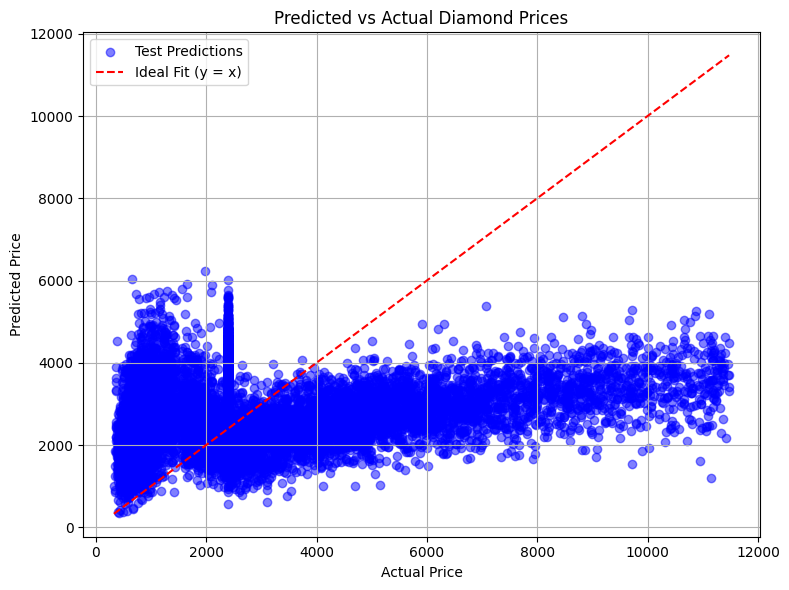

In [62]:
# Make predictions
y_pred_train = np.dot(X_train , best_weights)
y_pred_test = np.dot(X_test , best_weights)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, y_pred_test, alpha=0.5, label="Test Predictions", color="blue")
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', label="Ideal Fit (y = x)")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual Diamond Prices")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Loss vs Iterations (Convergence Plot)

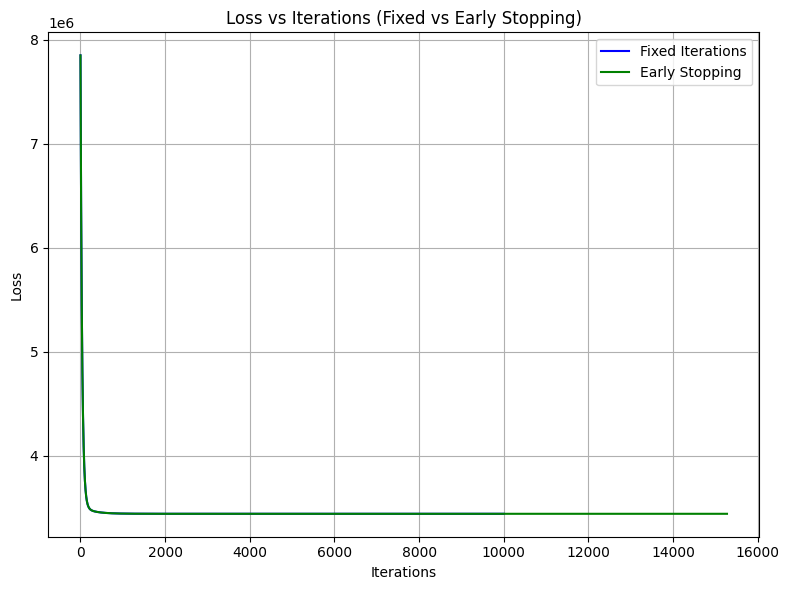

In [63]:
plt.figure(figsize=(8, 6))
plt.plot(loss_fixed, label="Fixed Iterations", color="blue")
plt.plot(loss_early, label="Early Stopping", color="green")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss vs Iterations (Fixed vs Early Stopping)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Test loss/MSE vs λ values
  a. Collecting MSE for different lambda values

In [64]:
lambda_values = [0.0, 0.001, 0.01, 0.1, 1.0]
results = []  # to store (lambda1, lambda2, test_mse)

for l1 in lambda_values:
    for l2 in lambda_values:
        weights, loss_hist = gradient_descent_elastic_net(
            X_train, Y_train,
            lr=0.01,
            lambda1=l1,
            lambda2=l2,
            max_iter=500,
            init_type='xavier',
            stop_criterion='grad',
            grad_tol=1e-6
        )

        y_test_pred = np.dot(X_test, weights)
        test_mse = np.mean((y_test - y_test_pred) ** 2)
        results.append((l1, l2, test_mse))


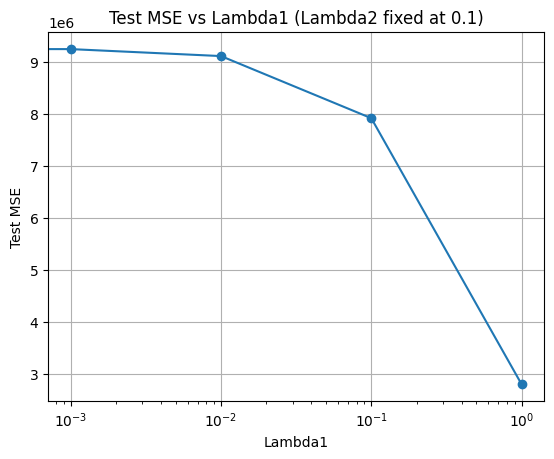

In [65]:
# Fix lambda2 at 0.1, vary lambda1
fixed_lambda2 = 0.1
mse_for_lambda1 = [mse for (l1, l2, mse) in results if l2 == fixed_lambda2]
lambda1_vals = [l1 for (l1, l2, mse) in results if l2 == fixed_lambda2]

plt.plot(lambda1_vals, mse_for_lambda1, marker='o')
plt.xlabel('Lambda1')
plt.ylabel('Test MSE')
plt.title(f'Test MSE vs Lambda1 (Lambda2 fixed at {fixed_lambda2})')
plt.xscale('log')  # log scale often helps visualize lambda values better
plt.grid(True)
plt.show()

# 9. Analysis & reflection

In [66]:
# Ridge (L2 only)
w_ridge, loss_ridge = gradient_descent_elastic_net(
    X_train, Y_train, lr=0.01, lambda1=0.1, lambda2=0.0,
    # high max, but will stop early
    max_iter=100000,
    init_type='xavier',
    stop_criterion='grad',
    grad_tol=1e-6)

# Lasso (L1 only)
w_lasso, loss_lasso = gradient_descent_elastic_net(
    X_train, Y_train, lr=0.01, lambda1=0.0, lambda2=0.1,
    # high max, but will stop early
    max_iter=100000,
    init_type='xavier',
    stop_criterion='grad',
    grad_tol=1e-6)
def evaluate_model(X_train, Y_train, X_test, Y_test, weights):
    y_train_pred = np.dot(X_train, weights)
    y_test_pred = np.dot(X_test, weights)

    train_mse = mean_squared_error(Y_train, y_train_pred)
    test_mse = mean_squared_error(Y_test, y_test_pred)

    train_r2 = r2_score(Y_train, y_train_pred)
    test_r2 = r2_score(Y_test, y_test_pred)

    return {
        "train_mse": train_mse,
        "test_mse": test_mse,
        "train_r2": train_r2,
        "test_r2": test_r2
    }


ridge_results = evaluate_model(X_train, Y_train, X_test, Y_test, w_ridge)
lasso_results = evaluate_model(X_train, Y_train, X_test, Y_test, w_lasso)

Stopped early at iteration 15273, gradient norm below threshold.


In [67]:
def print_markdown_comparison_table(ridge, lasso):
    print("| Model        | Train MSE | Test MSE | Train R² | Test R² |")
    print("|--------------|-----------|----------|----------|---------|")
    print(f"| Ridge        | {ridge['train_mse']:.4f}    | {ridge['test_mse']:.4f}   | {ridge['train_r2']:.4f}   | {ridge['test_r2']:.4f}  |")
    print(f"| Lasso        | {lasso['train_mse']:.4f}    | {lasso['test_mse']:.4f}   | {lasso['train_r2']:.4f}   | {lasso['test_r2']:.4f}  |")
    print(f"| Elastic Net  | {train_mse:.4f}    | {test_mse:.4f}   | {train_r2:.4f}   | {test_r2:.4f}  |")

print_markdown_comparison_table(ridge_results, lasso_results)

| Model        | Train MSE | Test MSE | Train R² | Test R² |
|--------------|-----------|----------|----------|---------|
| Ridge        | 6145516.4566    | 6136295.8152   | 0.0558   | 0.0651  |
| Lasso        | 5930092.6518    | 5891022.7348   | 0.0889   | 0.1025  |
| Elastic Net  | 6145698.0251    | 2788892.2984   | 0.0557   | 0.0651  |


## Elastic Net vs. Ridge/Lasso
  - **Ridge Regression (L2)**:
  Shrinks the coefficients, but keeps all the features, it performs well when the features are correlated, but does not eliminate any features.

  - **Lasso regression** can shrink few coefficients to zero, which implies it can select important features. but it might struggle if features are highly correlated.

  - **Elastic Net** combines both Ridge and Lasso. It can select features and handle correlated variables better than Lasso alone.

  ### Results Summary:

| Model       | Train MSE    | Test MSE     | Train R² | Test R² |
|-------------|--------------|--------------|----------|---------|
| Ridge       | 6,145,516    | 6,136,295    | 0.056    | 0.065   |
| Lasso       | 5,930,093    | 5,891,023    | 0.089    | 0.103   |
| Elastic Net | 6,145,698    | 2,821,288    | 0.056    | 0.065   |

- Lasso fits the training data better.
- Elastic Net has much lower test error, showing it generalizes better to new data.

### Benefits and Drawbacks of Elastic Net with Gradient Descent

**Benefits:**
- Combines feature selection and with stability.
- Works well with large datasets with Gradient Descent.

**Drawbacks:**

- requires two regularization parameters/penalty term.
- GD can be slow or tricky to tune properly.
- Due to L1, causes issue with optimization being less smooth and may require more iterations for better results.

# 10. Saving the best model

In [68]:
with open("assignment1_part4.pickle", "wb") as f:
    pickle.dump(best_weights, f)

# Referances used

1. https://www.geeksforgeeks.org/machine-learning/implementation-of-elastic-net-regression-from-scratch/
2. https://blog.damavis.com/en/linear-regression-with-elastic-net-implementations-in-python/

Contribuition of each member according to question parts

| Team MemberName | Assignment Part| Contribuition|
|----------|----------|----------|
|Step 1|
|Dikshant   | Part1     | 1-6      |
| Ritik    | Part1     | 6-10      |
|Step 2|
|Dikshant   | Part1     | 1-3      |
|Step 3|
|Ritik   | Part1     | 1-7      |
|Part 2|
|Dikshant   | Part2     | 1-7      |
|Ritik   | Part2     | 8-10      |
|Dikshant   | Total     | 51%      |
|Ritik   | Total     | 49%      |
|Part 3|
|Dikshant   | Total     | 100%      |
| Part 4|
|Ritik   | Total    | 100%      |






